## Study of crop yields and weather
#### TOPIC1： US corn production and the weather Correlation Exploration
#### TOPIC2：  Weather analysis based on machine learning

Programming for Artificial Intelligence (MSCAI1)
<br/>TABA 12/2024 ～ 01/2025
<br/>x21191646@student.ncirl.ie 
<br/>Wanpin Cai


# TOPIC 1： US corn production and the weather Correlation Exploration

In [2]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from io import StringIO
import sklearn
import json

### Dataset - 1,corn production of usa
* Get the dataset:
https://ourworldindata.org/agricultural-production#explore-data-on-agricultural-production

In [5]:
# GitHub URL
url = 'https://raw.githubusercontent.com/WanpinCai/programming_of_ai_taba_2025/main/data/wheat-production_us.csv'

# download
response = requests.get(url)

if response.status_code == 200:
    data = StringIO(response.text)
    data = pd.read_csv(data)
    
    data = data.drop(columns=['Country'])
    
    print("Data from GitHub without the 'Country' column:")
    print(data.head())
else:
    print(f"Failed to download the file. Status code: {response.status_code}")


Data from GitHub without the 'Country' column:
   Year  Production (t)
0  1961        33539008
1  1962        29718000
2  1963        31211888
3  1964        34928000
4  1965        35805010


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Year            62 non-null     int64
 1   Production (t)  62 non-null     int64
dtypes: int64(2)
memory usage: 1.1 KB


### Dataset - 2,weather of usa
* Get the dataset link: https://www.visualcrossing.com/weather/weather-data-services/ireland/us/last15days
* By extracting print(unique_stations)
Analysis shows that these locations are consistent with the US Corn Belt.

In [8]:
# Get GitHub file list
def get_file_links_from_github_api(repo_owner, repo_name, path):
    api_url = f"https://api.github.com/repos/{repo_owner}/{repo_name}/contents/{path}"
    response = requests.get(api_url)
    if response.status_code == 200:
        files = response.json()
        file_links = [
            file["download_url"]
            for file in files
            if file["type"] == "file" and file["name"].endswith(".txt")
        ]
        return file_links
    else:
        print(f"Failed to fetch file list: {response.status_code}")
        return []

# Expanding nested JSON data
def flatten_json_data(file_links):
    all_data = []
    for file_link in file_links:
        response = requests.get(file_link)
        if response.status_code == 200:
            try:
                json_data = json.loads(response.text)  # Parsing JSON data
                common_fields = {
                    "latitude": json_data["latitude"],
                    "longitude": json_data["longitude"],
                    "resolvedAddress": json_data["resolvedAddress"],
                    "address": json_data["address"],
                    "timezone": json_data["timezone"],
                    "tzoffset": json_data["tzoffset"],
                    "name": json_data["name"],
                }
                for day in json_data["days"]:
                    combined_data = {**common_fields, **day} 
                    all_data.append(combined_data)
            except json.JSONDecodeError as e:
                print(f"Error decoding JSON from {file_link}: {e}")
    df = pd.DataFrame(all_data)
    return df

repo_owner = "WanpinCai"
repo_name = "programming_of_ai_taba_2025"
path = "data/weather"

file_links = get_file_links_from_github_api(repo_owner, repo_name, path)
if file_links:
    df = flatten_json_data(file_links)
    print(df.head())  
    print(df.columns)  
else:
    print("No found any txt document.")


   latitude  longitude resolvedAddress address          timezone  tzoffset  \
0   38.8904    -77.032   United States     usa  America/New_York      -5.0   
1   38.8904    -77.032   United States     usa  America/New_York      -5.0   
2   38.8904    -77.032   United States     usa  America/New_York      -5.0   
3   38.8904    -77.032   United States     usa  America/New_York      -5.0   
4   38.8904    -77.032   United States     usa  America/New_York      -5.0   

  name    datetime  datetimeEpoch  tempmax  ...    sunset  sunsetEpoch  \
0  usa  2004-02-05     1075957200     35.8  ...  17:33:33   1076020413   
1  usa  2004-02-06     1076043600     36.9  ...  17:34:43   1076106883   
2  usa  2004-02-07     1076130000     44.8  ...  17:35:53   1076193353   
3  usa  2004-02-08     1076216400     36.9  ...  17:37:02   1076279822   
4  usa  2004-02-09     1076302800     48.8  ...  17:38:11   1076366291   

   moonphase                    conditions  \
0       0.48  Snow, Rain, Partially clou

In [9]:
df.head(2)

,latitude,longitude,resolvedAddress,address,timezone,tzoffset,name,datetime,datetimeEpoch,tempmax,...,sunset,sunsetEpoch,moonphase,conditions,description,icon,stations,source,events,severerisk
0,38.8904,-77.032,United States,usa,America/New_York,-5.0,usa,2004-02-05,1075957200,35.8,...,17:33:33,1076020413,0.48,"Snow, Rain, Partially cloudy",Partly cloudy throughout the day with late aft...,rain,"[99440099999, 72405013743, 72403093738, 724060...",obs,NaN,NaN
1,38.8904,-77.032,United States,usa,America/New_York,-5.0,usa,2004-02-06,1076043600,36.9,...,17:34:43,1076106883,0.50,"Snow, Rain, Overcast",Cloudy skies throughout the day with a chance ...,rain,"[72403799999, 99440099999, 72405013743, 724030...",obs,NaN,NaN


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7625 entries, 0 to 7624
Data columns (total 44 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   latitude         7625 non-null   float64
 1   longitude        7625 non-null   float64
 2   resolvedAddress  7625 non-null   object 
 3   address          7625 non-null   object 
 4   timezone         7625 non-null   object 
 5   tzoffset         7625 non-null   float64
 6   name             7625 non-null   object 
 7   datetime         7625 non-null   object 
 8   datetimeEpoch    7625 non-null   int64  
 9   tempmax          7625 non-null   float64
 10  tempmin          7625 non-null   float64
 11  temp             7625 non-null   float64
 12  feelslikemax     7625 non-null   float64
 13  feelslikemin     7625 non-null   float64
 14  feelslike        7625 non-null   float64
 15  dew              7625 non-null   float64
 16  humidity         7625 non-null   float64
 17  precip        

#### delete the columns which is no need

In [12]:
columns_to_drop = ['resolvedAddress','address','timezone','tzoffset','name','datetimeEpoch','sunriseEpoch', 'sunsetEpoch','stations', 'source']

df = df.drop(columns=columns_to_drop, axis=1)



#### Handling nested fields

In [14]:
df['preciptype'] = df['preciptype'].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)


#### Check for missing values

In [16]:
missing_summary = df.isnull().sum()
print(missing_summary)


latitude             0
longitude            0
datetime             0
tempmax              0
tempmin              0
temp                 0
feelslikemax         0
feelslikemin         0
feelslike            0
dew                  0
humidity             0
precip               0
precipprob           0
precipcover          0
preciptype        4373
snow                 0
snowdepth            0
windgust          2252
windspeed            0
winddir              0
pressure             0
cloudcover           0
visibility           0
solarradiation    2185
solarenergy       2185
uvindex           2185
sunrise              0
sunset               0
moonphase            0
conditions           0
description          0
icon                 0
events            7325
severerisk        7007
dtype: int64


In [17]:
# Categorical column filling
df['preciptype'] = df['preciptype'].fillna('None')
df['events'] = df['events'].fillna('No Event')
df['severerisk'] = df['severerisk'].fillna(0)


In [18]:
# Fill the numerical column (mean)
df['windgust'] = df['windgust'].fillna(df['windgust'].mean())
df['solarradiation'] = df['solarradiation'].fillna(df['solarradiation'].mean())
df['solarenergy'] = df['solarenergy'].fillna(df['solarenergy'].mean())
df['uvindex'] = df['uvindex'].fillna(df['uvindex'].mean())
print(df.isnull().sum())


latitude          0
longitude         0
datetime          0
tempmax           0
tempmin           0
temp              0
feelslikemax      0
feelslikemin      0
feelslike         0
dew               0
humidity          0
precip            0
precipprob        0
precipcover       0
preciptype        0
snow              0
snowdepth         0
windgust          0
windspeed         0
winddir           0
pressure          0
cloudcover        0
visibility        0
solarradiation    0
solarenergy       0
uvindex           0
sunrise           0
sunset            0
moonphase         0
conditions        0
description       0
icon              0
events            0
severerisk        0
dtype: int64


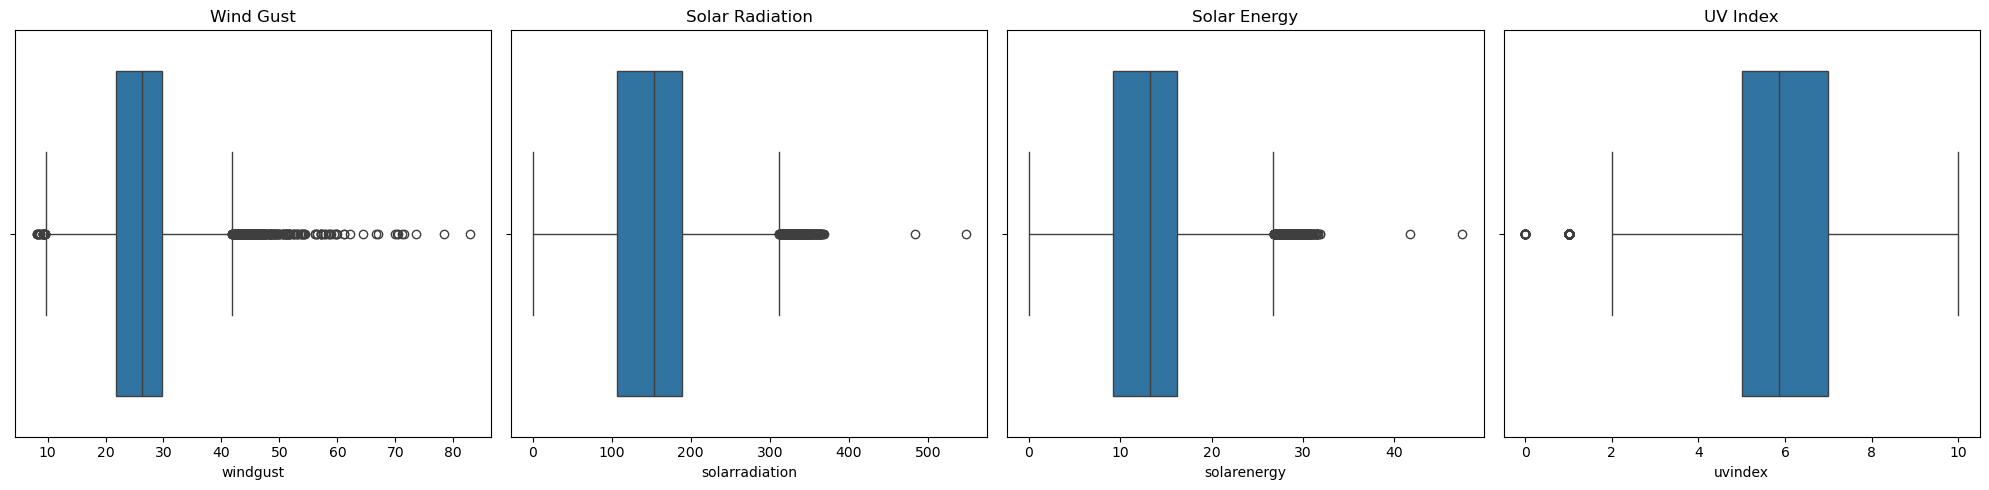

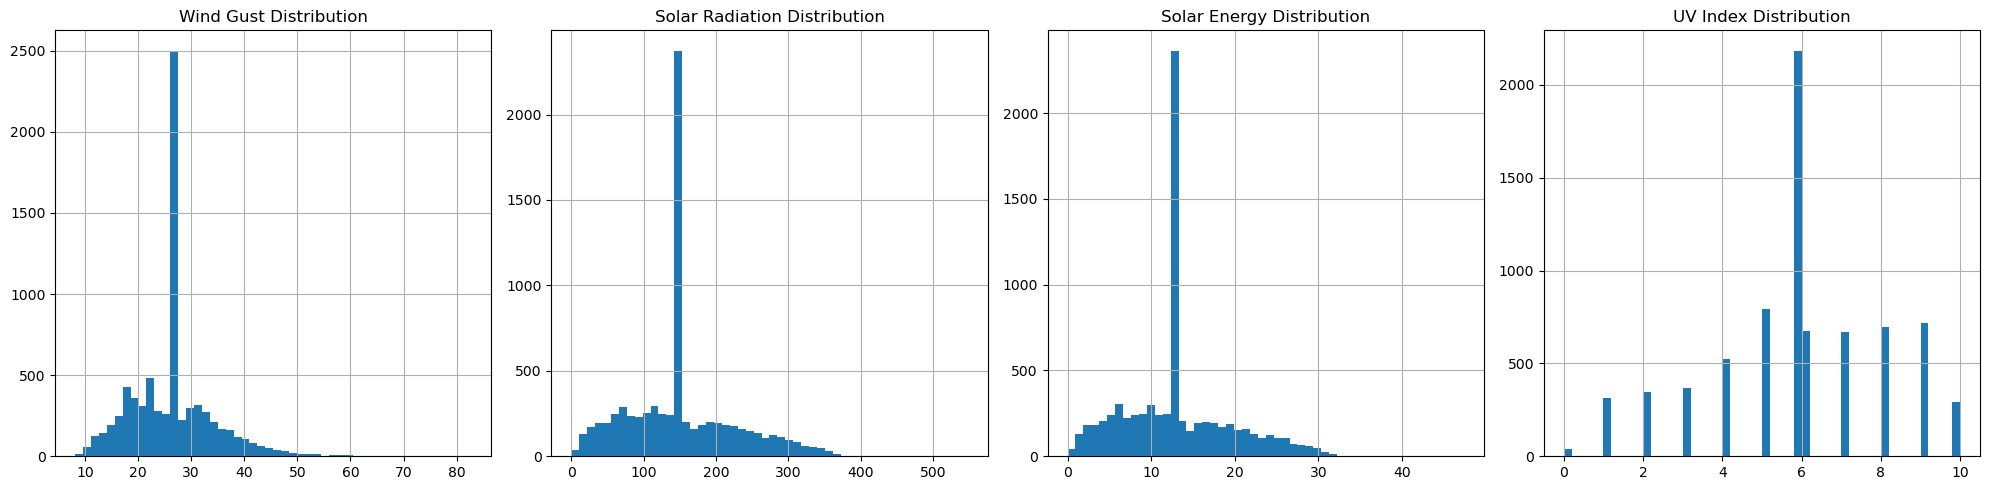

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 5))

# （boxplot）
plt.subplot(1, 4, 1)
sns.boxplot(x=df['windgust'])
plt.title('Wind Gust')

plt.subplot(1, 4, 2)
sns.boxplot(x=df['solarradiation'])
plt.title('Solar Radiation')

plt.subplot(1, 4, 3)
sns.boxplot(x=df['solarenergy'])
plt.title('Solar Energy')

plt.subplot(1, 4, 4)
sns.boxplot(x=df['uvindex'])
plt.title('UV Index')

plt.tight_layout()
plt.show()

# （histogram）
plt.figure(figsize=(20, 5))

plt.subplot(1, 4, 1)
df['windgust'].hist(bins=50)
plt.title('Wind Gust Distribution')

plt.subplot(1, 4, 2)
df['solarradiation'].hist(bins=50)
plt.title('Solar Radiation Distribution')

plt.subplot(1, 4, 3)
df['solarenergy'].hist(bins=50)
plt.title('Solar Energy Distribution')

plt.subplot(1, 4, 4)
df['uvindex'].hist(bins=50)
plt.title('UV Index Distribution')

plt.tight_layout()
plt.show()


Weather data, if there are outliers, they are considered to be extremely abnormal weather. They are only marked and analyzed, and not cleaned.

#### Convert date and time

In [22]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [23]:
df.head()

,latitude,longitude,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,...,solarenergy,uvindex,sunrise,sunset,moonphase,conditions,description,icon,events,severerisk
0,38.8904,-77.032,2004-02-05,35.8,26.3,32.1,33.1,21.2,26.7,19.5,...,13.221857,5.864154,07:11:11,17:33:33,0.48,"Snow, Rain, Partially cloudy",Partly cloudy throughout the day with late aft...,rain,No Event,0.0
1,38.8904,-77.032,2004-02-06,36.9,30.3,33.7,35.0,23.5,28.9,32.1,...,13.221857,5.864154,07:10:11,17:34:43,0.50,"Snow, Rain, Overcast",Cloudy skies throughout the day with a chance ...,rain,No Event,0.0
2,38.8904,-77.032,2004-02-07,44.8,34.0,39.1,37.3,22.4,32.4,27.5,...,13.221857,5.864154,07:09:09,17:35:53,0.55,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,No Event,0.0
3,38.8904,-77.032,2004-02-08,36.9,26.7,31.0,33.9,13.8,21.6,11.3,...,13.221857,5.864154,07:08:06,17:37:02,0.58,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,No Event,0.0
4,38.8904,-77.032,2004-02-09,48.8,25.9,38.0,44.4,16.3,31.0,21.6,...,13.221857,5.864154,07:07:02,17:38:11,0.62,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,No Event,0.0


#### Feature Engineering - Add column: Sunshine time

In [25]:
# Assume that the date of all times is 2025-01-01, combine the date and time
df['sunrise'] = pd.to_datetime('2025-01-01 ' + df['sunrise'], format='%Y-%m-%d %H:%M:%S')
df['sunset'] = pd.to_datetime('2025-01-01 ' + df['sunset'], format='%Y-%m-%d %H:%M:%S')

# Calculate sunshine hours（sunset - sunrise）
df['sunlight_duration'] = (df['sunset'] - df['sunrise']).dt.total_seconds() / 3600  # transfer as hours

print(df[['sunrise', 'sunset', 'sunlight_duration']].head())


              sunrise              sunset  sunlight_duration
0 2025-01-01 07:11:11 2025-01-01 17:33:33          10.372778
1 2025-01-01 07:10:11 2025-01-01 17:34:43          10.408889
2 2025-01-01 07:09:09 2025-01-01 17:35:53          10.445556
3 2025-01-01 07:08:06 2025-01-01 17:37:02          10.482222
4 2025-01-01 07:07:02 2025-01-01 17:38:11          10.519167


Empty DataFrame
Columns: [latitude, longitude, datetime, tempmax, tempmin, temp, feelslikemax, feelslikemin, feelslike, dew, humidity, precip, precipprob, precipcover, preciptype, snow, snowdepth, windgust, windspeed, winddir, pressure, cloudcover, visibility, solarradiation, solarenergy, uvindex, sunrise, sunset, moonphase, conditions, description, icon, events, severerisk, sunlight_duration]
Index: []

[0 rows x 35 columns]


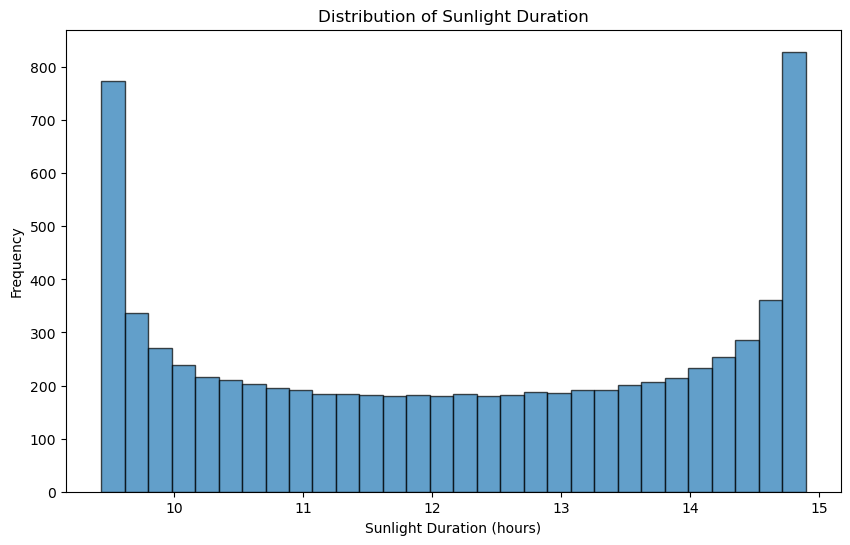

In [26]:
# Calculate IQR
Q1 = df['sunlight_duration'].quantile(0.25)
Q3 = df['sunlight_duration'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['sunlight_duration'] < lower_bound) | (df['sunlight_duration'] > upper_bound)]

print(outliers)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df['sunlight_duration'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of Sunlight Duration')
plt.xlabel('Sunlight Duration (hours)')
plt.ylabel('Frequency')
plt.show()




#### Feature Engineering - Add column: drought_index

In [28]:
# The drought index measures drought conditions based on precipitation and temperature, and is derived from the relationship between temperature and precipitation:

df['drought_index'] = (df['tempmax'] - df['temp']) / (df['precip'] + 1)
print(df['drought_index'].head())

0     3.523810
1     1.213961
2     5.700000
3     5.900000
4    10.800000
Name: drought_index, dtype: float64


In [29]:
df.head()

,latitude,longitude,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,...,sunrise,sunset,moonphase,conditions,description,icon,events,severerisk,sunlight_duration,drought_index
0,38.8904,-77.032,2004-02-05,35.8,26.3,32.1,33.1,21.2,26.7,19.5,...,2025-01-01 07:11:11,2025-01-01 17:33:33,0.48,"Snow, Rain, Partially cloudy",Partly cloudy throughout the day with late aft...,rain,No Event,0.0,10.372778,3.523810
1,38.8904,-77.032,2004-02-06,36.9,30.3,33.7,35.0,23.5,28.9,32.1,...,2025-01-01 07:10:11,2025-01-01 17:34:43,0.50,"Snow, Rain, Overcast",Cloudy skies throughout the day with a chance ...,rain,No Event,0.0,10.408889,1.213961
2,38.8904,-77.032,2004-02-07,44.8,34.0,39.1,37.3,22.4,32.4,27.5,...,2025-01-01 07:09:09,2025-01-01 17:35:53,0.55,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,No Event,0.0,10.445556,5.700000
3,38.8904,-77.032,2004-02-08,36.9,26.7,31.0,33.9,13.8,21.6,11.3,...,2025-01-01 07:08:06,2025-01-01 17:37:02,0.58,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,No Event,0.0,10.482222,5.900000
4,38.8904,-77.032,2004-02-09,48.8,25.9,38.0,44.4,16.3,31.0,21.6,...,2025-01-01 07:07:02,2025-01-01 17:38:11,0.62,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,No Event,0.0,10.519167,10.800000


### Data Aggregation

In [31]:
import pandas as pd

df['datetime'] = pd.to_datetime(df['datetime'])
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month

growth_season_df = df[df['month'].isin([4, 5, 6, 7, 8, 9])]

# Summarize weather data by year and calculate the average temperature, total precipitation, wind speed, etc. from April to September each year
weather_annual_growth_season = growth_season_df.groupby('year').agg({
    'temp': 'mean',  
    'tempmax': 'mean',  
    'tempmin': 'mean',  
    'precip': 'sum',  
    'windspeed': 'mean',  
    'humidity': 'mean', 
    'cloudcover': 'mean',  
    'solarradiation': 'sum', 
    'uvindex': 'mean',  
    'sunlight_duration':'mean',
    'drought_index':'mean',
}).reset_index()

data.rename(columns={'Year': 'year'}, inplace=True)

final_data = pd.merge(data, weather_annual_growth_season, on='year', how='left')

final_data = final_data.dropna()

print(final_data.head())


    year  Production (t)       temp    tempmax    tempmin  precip  windspeed  \
43  2004        58697040  70.992896  78.785246  64.021858  27.183  14.601093   
44  2005        57241990  71.355191  79.827869  63.347541  20.371  13.926776   
45  2006        49216040  70.769945  79.292350  62.834426  30.495  14.440437   
46  2007        55820360  71.120765  80.024590  62.840984  13.889  14.242077   
47  2008        68016100  71.725137  80.314754  63.675956  32.653  14.294536   

     humidity  cloudcover  solarradiation   uvindex  sunlight_duration  \
43  69.626776   72.350273    28050.724412  5.864154          13.844068   
44  63.373770   64.925683    28050.724412  5.864154          13.845228   
45  65.655738   66.661202    28050.724412  5.864154          13.846310   
46  61.077596   61.603279    28050.724412  5.864154          13.847369   
47  62.883607   64.205464    28050.724412  5.864154          13.843865   

    drought_index  
43       7.265442  
44       8.033780  
45       7.969

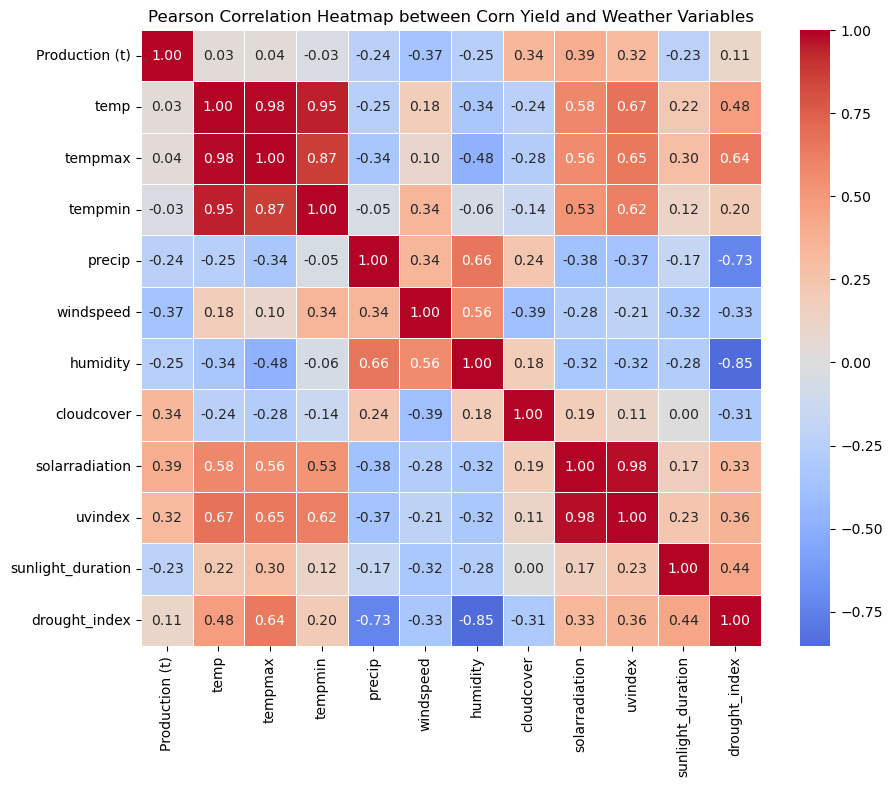

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


weather_columns = ['Production (t)', 'temp', 'tempmax', 'tempmin', 'precip', 'windspeed', 'humidity', 
                   'cloudcover', 'solarradiation', 'uvindex', 'sunlight_duration', 'drought_index']
final_data_subset = final_data[weather_columns]

correlation_matrix = final_data_subset.corr(method='pearson')
# print(correlation_matrix)


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, center=0)
plt.title('Pearson Correlation Heatmap between Corn Yield and Weather Variables')
plt.show()


/var/folders/0b/k_200k1n0zz0xk259hgtb7qw0000gn/T/ipykernel_44530/762284760.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=correlation_df, x='Correlation', y='Variable', palette='coolwarm')


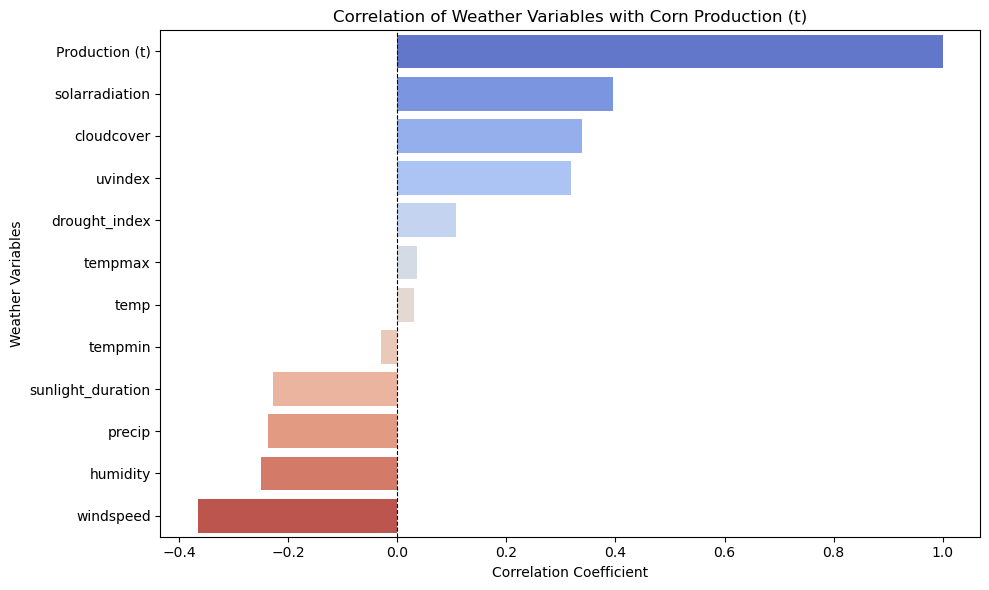

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

correlation_with_production = final_data_subset.corr(method='pearson')['Production (t)'].sort_values(ascending=False)

correlation_df = correlation_with_production.to_frame().reset_index()
correlation_df.columns = ['Variable', 'Correlation']

plt.figure(figsize=(10, 6))
sns.barplot(data=correlation_df, x='Correlation', y='Variable', palette='coolwarm')
plt.title('Correlation of Weather Variables with Corn Production (t)')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Weather Variables')
plt.axvline(0, color='black', linewidth=0.8, linestyle='--')
plt.tight_layout()
plt.show()


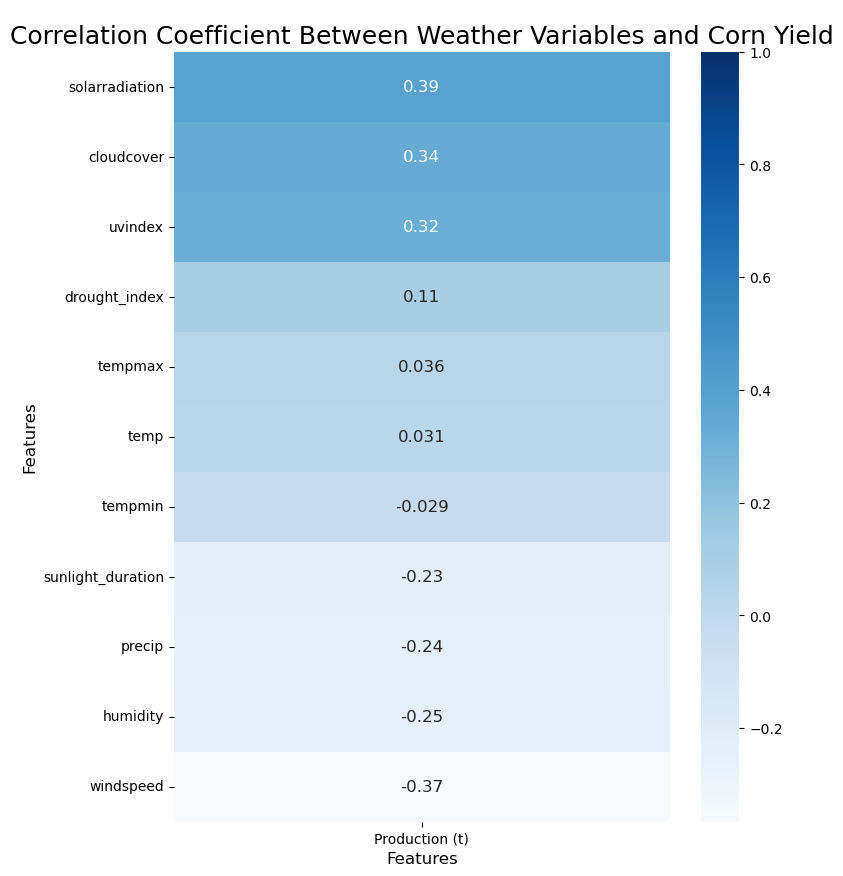

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


weather_columns = ['Production (t)', 'temp', 'tempmax', 'tempmin', 'precip', 'windspeed', 'humidity', 
                   'cloudcover', 'solarradiation', 'uvindex', 'sunlight_duration', 'drought_index']
final_data_subset = final_data[weather_columns]

correlation_matrix = final_data_subset.corr(method='pearson')

target_column = 'Production (t)'
correlation_with_target = correlation_matrix[[target_column]].sort_values(by=target_column, ascending=False)

fig = plt.figure(figsize=(8, 10))
ax = sns.heatmap(correlation_with_target, annot=True, annot_kws={"size": 12}, cmap='Blues', cbar=True)
ax.set_title('Correlation Coefficient Between Weather Variables and Corn Yield', fontsize=18)
ax.set_xlabel('Features', fontsize=12)
ax.set_ylabel('Features', fontsize=12)
ax.tick_params(axis="both", labelsize=10)

y_min, y_max = ax.get_ylim()
ax.set_ylim(top=y_max + 1)

plt.show()


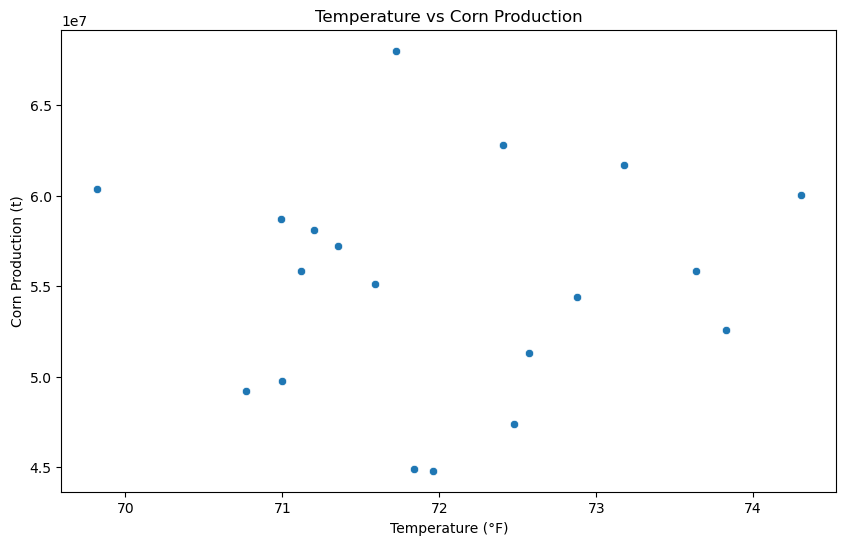

In [35]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=final_data, x='temp', y='Production (t)')
plt.title('Temperature vs Corn Production')
plt.xlabel('Temperature (°F)')
plt.ylabel('Corn Production (t)')
plt.show()

## Machine Learning

#### Data prepared

In [38]:
final_data.fillna(final_data.median(), inplace=True)


In [39]:
correlation_threshold = 0.2
target = 'Production (t)'
high_corr_features = correlation_matrix[target][correlation_matrix[target].abs() > correlation_threshold].index

X = final_data[high_corr_features.drop(target)]
y = final_data[target]

print(X.shape)
print(y.shape)


(19, 7)
(19,)


#### Feature Standardization

In [41]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [42]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
X_pca = pca.fit_transform(X)


#### Dataset Partitioning

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)



#### Model selection - Linear Regression 

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

y_pred_lr = model_lr.predict(X_test)
r2_lr = model_lr.score(X_test, y_test)  
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))  
mae_lr = mean_absolute_error(y_test, y_pred_lr)  

print(f"Linear Regression R²: {r2_lr}")
print(f"Linear Regression RMSE: {rmse_lr}")
print(f"Linear Regression MAE: {mae_lr}")



Linear Regression R²: -43.99271953585663
Linear Regression RMSE: 11283785.659326185
Linear Regression MAE: 9958982.86904314


#### Model selection - XGBoost

In [48]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

model_xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model_xgb.fit(X_train, y_train)

y_pred_xgb = model_xgb.predict(X_test)
r2_xgb = model_xgb.score(X_test, y_test)  # 计算 R²
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))  # 计算 RMSE
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)  # 计算 MAE

print(f"XGBoost R²: {r2_xgb}")
print(f"XGBoost RMSE: {rmse_xgb}")
print(f"XGBoost MAE: {mae_xgb}")



XGBoost R²: -1.8769858264172297
XGBoost RMSE: 2853333.7074155905
XGBoost MAE: 2766368.0


#### Model selection - Random Forest Regression

In [50]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)

model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

#### Model Evaluation

In [52]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

mae = mean_absolute_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R²: {r2}")


RMSE: 4839544.853524316
MAE: 4173908.120000001
R²: -7.276402956152113


#### Model Tuning

In [54]:
from sklearn.model_selection import GridSearchCV

# Defining the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Hyperparameter tuning using grid search
grid_search = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Get the best hyperparameter combination
print("Best parameters:", grid_search.best_params_)

# Train the model using optimal hyperparameters
best_model = grid_search.best_estimator_

# Evaluate on the test set
y_pred_best = best_model.predict(X_test)
rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best))
r2_best = r2_score(y_test, y_pred_best)

print(f"Optimized RMSE: {rmse_best}")
print(f"Optimized R²: {r2_best}")


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Optimized RMSE: 3797970.164378697
Optimized R²: -4.097247083049627


#### Visualize the results

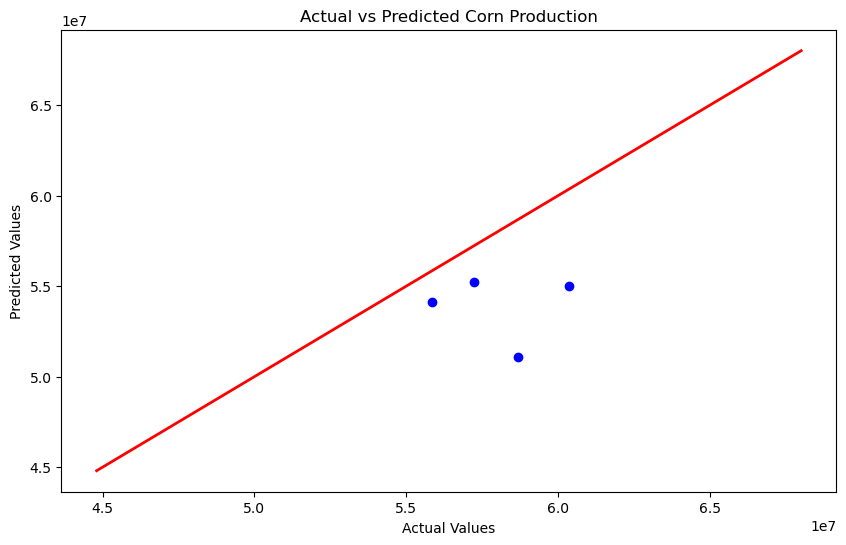

In [56]:
import matplotlib.pyplot as plt

# Plot a comparison chart of actual and predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Corn Production')
plt.show()


#### Model explanation

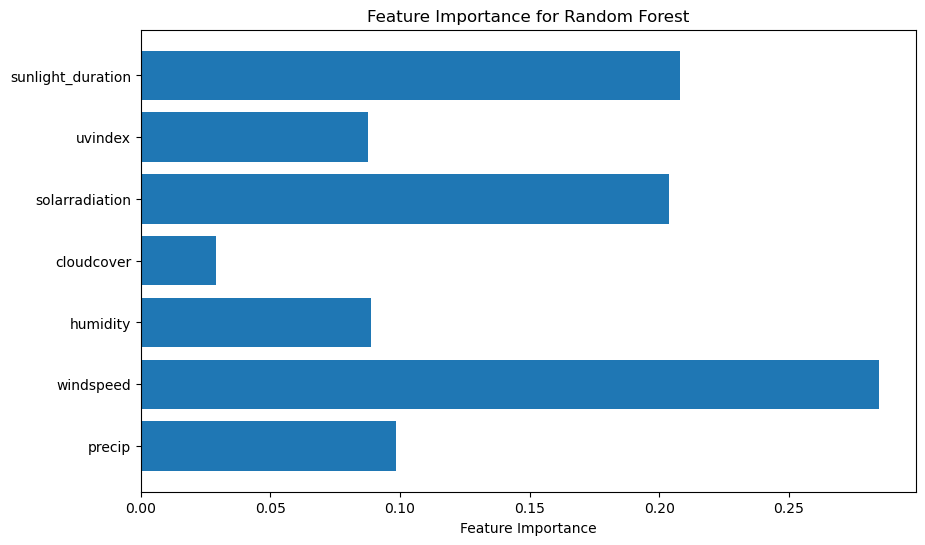

In [58]:
# Check the importance of each feature
feature_importances = model.feature_importances_

plt.figure(figsize=(10, 6))
plt.barh(X.columns, feature_importances)
plt.xlabel('Feature Importance')
plt.title('Feature Importance for Random Forest')
plt.show()


# TOPIC 2: Climate warming analysis based on machine learning（2004-2024）
I couldn't find the data set, and I couldn't get away from the team's work. As Professor Shreyas mentioned, we can do completely different project explorations, so I used weather models to study issues like climate change on my own.
Temperature trend analysis: Analyze the temperature change trend in the past 20 years to determine whether there is a phenomenon of climate warming.


In [60]:
df.head()

,latitude,longitude,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,...,moonphase,conditions,description,icon,events,severerisk,sunlight_duration,drought_index,year,month
0,38.8904,-77.032,2004-02-05,35.8,26.3,32.1,33.1,21.2,26.7,19.5,...,0.48,"Snow, Rain, Partially cloudy",Partly cloudy throughout the day with late aft...,rain,No Event,0.0,10.372778,3.523810,2004,2
1,38.8904,-77.032,2004-02-06,36.9,30.3,33.7,35.0,23.5,28.9,32.1,...,0.50,"Snow, Rain, Overcast",Cloudy skies throughout the day with a chance ...,rain,No Event,0.0,10.408889,1.213961,2004,2
2,38.8904,-77.032,2004-02-07,44.8,34.0,39.1,37.3,22.4,32.4,27.5,...,0.55,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,No Event,0.0,10.445556,5.700000,2004,2
3,38.8904,-77.032,2004-02-08,36.9,26.7,31.0,33.9,13.8,21.6,11.3,...,0.58,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,No Event,0.0,10.482222,5.900000,2004,2
4,38.8904,-77.032,2004-02-09,48.8,25.9,38.0,44.4,16.3,31.0,21.6,...,0.62,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,No Event,0.0,10.519167,10.800000,2004,2


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7625 entries, 0 to 7624
Data columns (total 38 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   latitude           7625 non-null   float64       
 1   longitude          7625 non-null   float64       
 2   datetime           7625 non-null   datetime64[ns]
 3   tempmax            7625 non-null   float64       
 4   tempmin            7625 non-null   float64       
 5   temp               7625 non-null   float64       
 6   feelslikemax       7625 non-null   float64       
 7   feelslikemin       7625 non-null   float64       
 8   feelslike          7625 non-null   float64       
 9   dew                7625 non-null   float64       
 10  humidity           7625 non-null   float64       
 11  precip             7625 non-null   float64       
 12  precipprob         7625 non-null   float64       
 13  precipcover        7625 non-null   float64       
 14  precipty

### 1 Data preprocessing

#### 1.1 Checking for Missing data


In [64]:
missing = df.isnull().sum(axis=0)
missing[missing!=0]

Series([], dtype: int64)

#### 1.2 Checking for Duplicate Data


In [66]:
print(df['preciptype'].head())

if df['preciptype'].apply(type).eq(list).any():
    df['preciptype'] = df['preciptype'].astype(str)

columns_to_check = ['preciptype', 'conditions', 'icon', 'events']
for col in columns_to_check:
    if df[col].apply(type).eq(list).any():
        df[col] = df[col].astype(str)

# One-Hot Encoding
df = pd.get_dummies(df, columns=columns_to_check, drop_first=True)


0    rain, snow
1    rain, snow
2          None
3          None
4          None
Name: preciptype, dtype: object


In [67]:
df.duplicated().sum()

0

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7625 entries, 0 to 7624
Columns: 353 entries, latitude to events_[{'datetime': '2024-12-11T14:38:00', 'datetimeEpoch': 1733945880, 'type': 'wind', 'latitude': 38.96, 'longitude': -76.75, 'distance': 15.9, 'desc': 'Multiple trees blew down near Benjamin Tasker Middle School. (LWX)', 'speed': 0.0}]
dtypes: bool(319), datetime64[ns](3), float64(28), int32(2), object(1)
memory usage: 4.2+ MB


#### 1.3 Add columns

In [70]:
#Add seasonal features
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

df['season'] = df['month'].apply(get_season)
df['daylength'] = (df['sunset'] - df['sunrise']).dt.total_seconds() / 3600


### 2 Exploratory Analysis

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7625 entries, 0 to 7624
Columns: 355 entries, latitude to daylength
dtypes: bool(319), datetime64[ns](3), float64(29), int32(2), object(2)
memory usage: 4.4+ MB


#### 2.1 Correlation Analysis


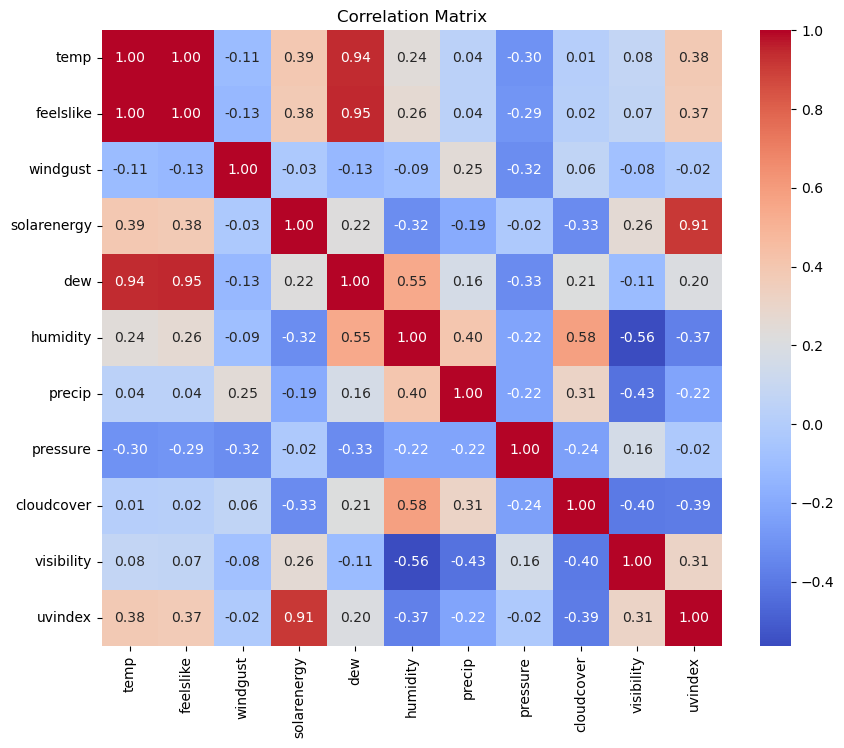

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

selected_features = ['temp', 'feelslike', 'windgust', 'solarenergy','dew', 'humidity',
       'precip', 'pressure','cloudcover', 'visibility', 'uvindex']  
corr_matrix = df[selected_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


#### 2.2 Histograms and Pairwise Analysis


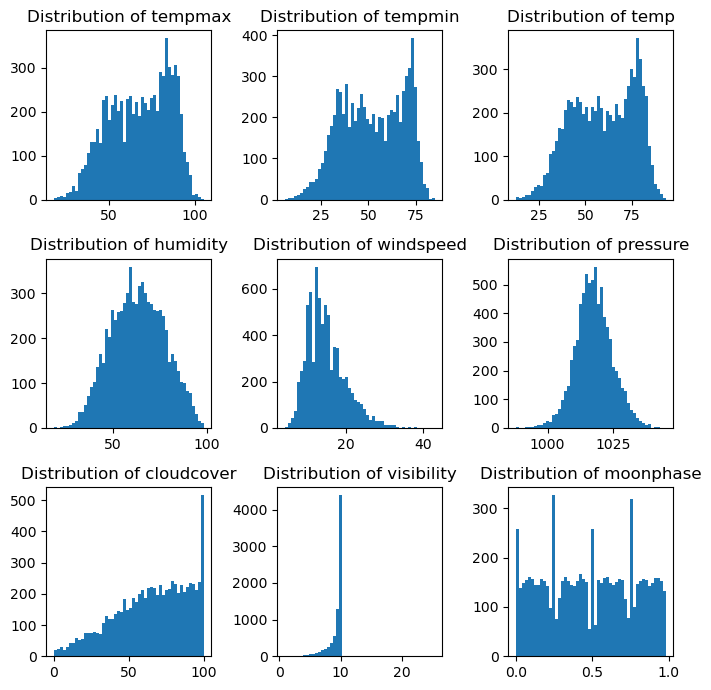

In [76]:
import matplotlib.pyplot as plt

columns_to_plot = [
    'tempmax', 'tempmin', 'temp', 'humidity',
    'windspeed', 'pressure', 'cloudcover', 'visibility', 'moonphase'
]

fig, axes = plt.subplots(3, 3, figsize=(7, 7))  # 3行3列
axes = axes.flatten()

for i, col in enumerate(columns_to_plot):
    axes[i].hist(df[col].dropna(), bins=50)  # 使用dropna避免缺失值影响
    axes[i].set_title(f"Distribution of {col}")
    
plt.tight_layout()
plt.show()


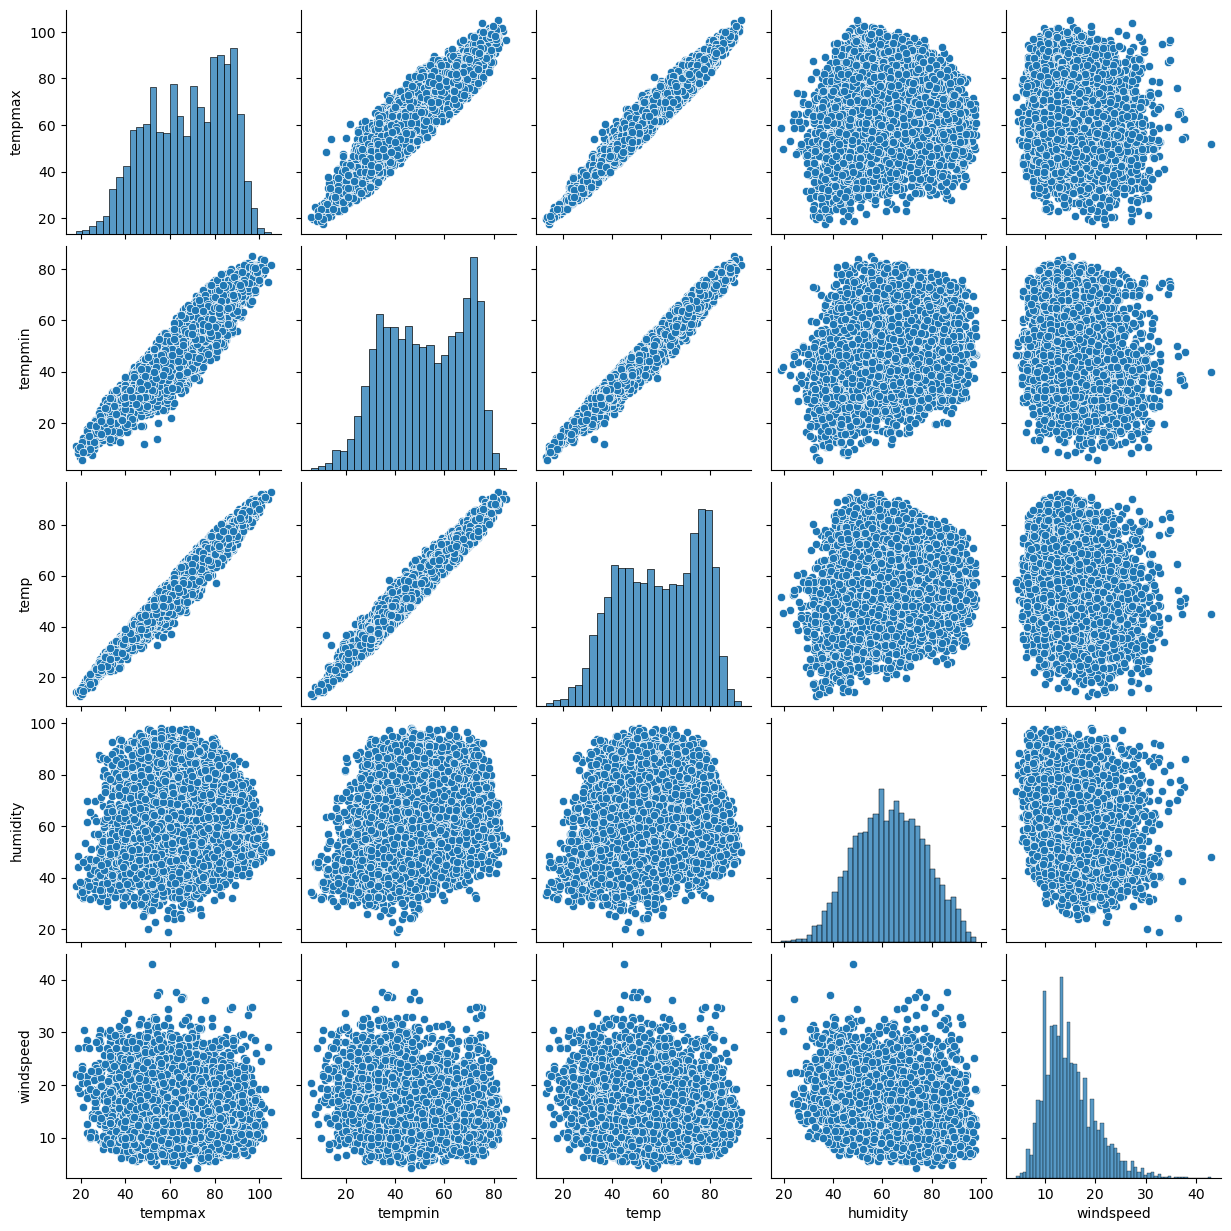

In [77]:
import seaborn as sns

columns_to_pair = ['tempmax', 'tempmin', 'temp', 'humidity', 'windspeed']
sns.pairplot(df[columns_to_pair])
plt.show()


#### 2.3 Climate Warming Analysis
Analyze the temperature change trend in the past 20 years to determine whether there is a climate warming phenomenon.

In [79]:
df['year'] = pd.to_datetime(df['datetime']).dt.year

yearly_temp = df.groupby('year')['temp'].mean().reset_index()

recent_temp = yearly_temp[yearly_temp['year'] >= yearly_temp['year'].max() - 19]


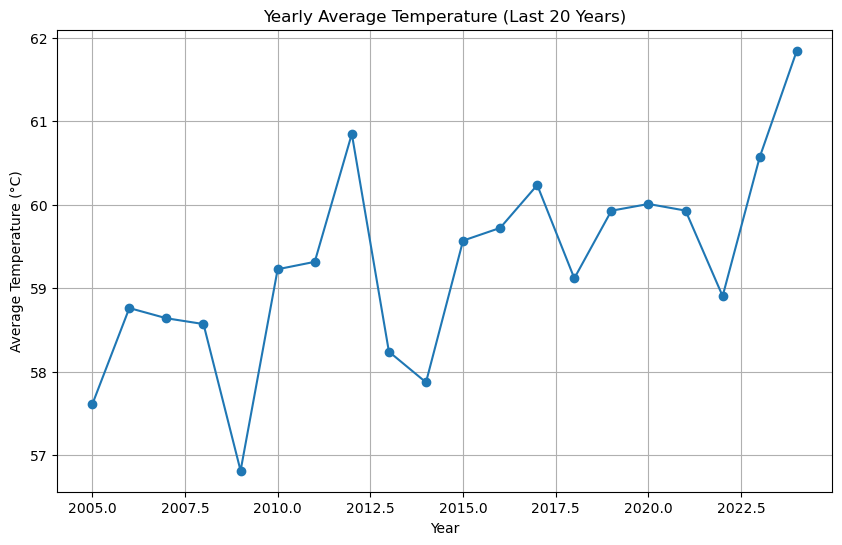

In [80]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(recent_temp['year'], recent_temp['temp'], marker='o', linestyle='-')
plt.title("Yearly Average Temperature (Last 20 Years)")
plt.xlabel("Year")
plt.ylabel("Average Temperature (°C)")
plt.grid(True)
plt.show()


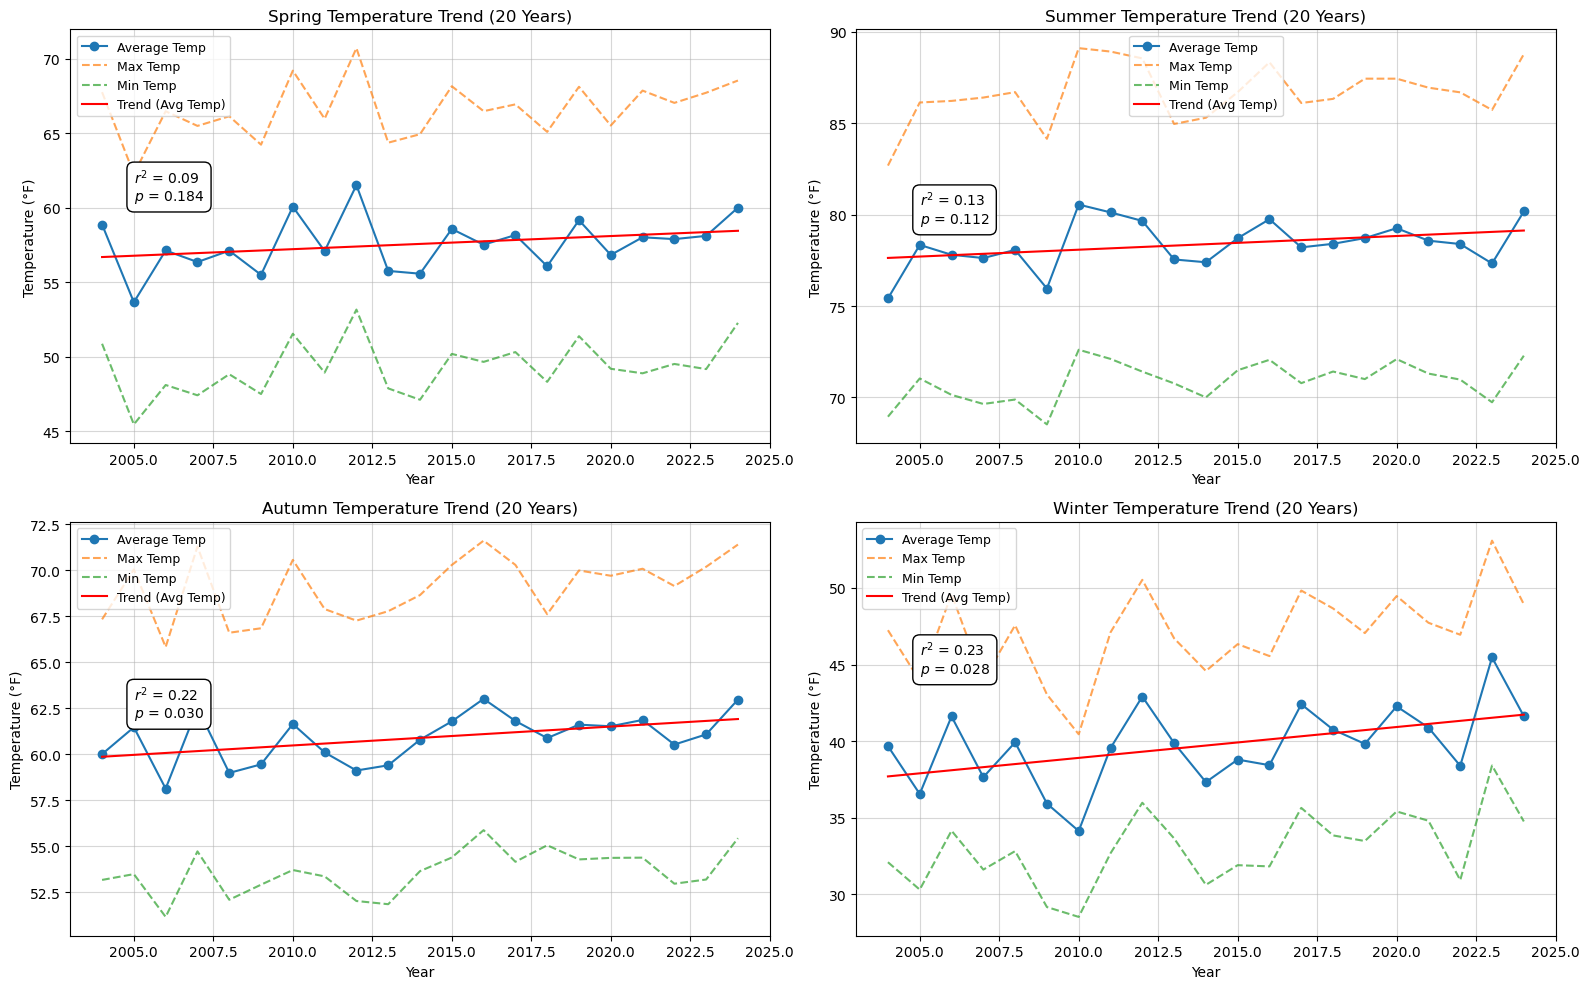

In [81]:
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Plot 20-year climate change trends by season and add r_value and p_value
seasons = ['Spring', 'Summer', 'Autumn', 'Winter']
plt.figure(figsize=(16, 10))

# Group df by year and season to get the temperature data
seasonal_trends = df.groupby(['year', 'season']).agg(
    temp=('temp', 'mean'),        # Average temperature
    tempmax=('tempmax', 'mean'),  # Max temperature
    tempmin=('tempmin', 'mean')   # Min temperature
).reset_index()

for i, season in enumerate(seasons, 1):
    plt.subplot(2, 2, i)
    data = seasonal_trends[seasonal_trends['season'] == season]
    
    # Temperature changes
    plt.plot(data['year'], data['temp'], label='Average Temp', marker='o')
    plt.plot(data['year'], data['tempmax'], label='Max Temp', linestyle='--', alpha=0.7)
    plt.plot(data['year'], data['tempmin'], label='Min Temp', linestyle='--', alpha=0.7)
    
    # Trend Lines
    slope, intercept, r_value, p_value, std_err = linregress(data['year'], data['temp'])
    trend_line = intercept + slope * data['year']
    plt.plot(data['year'], trend_line, label='Trend (Avg Temp)', color='red')
    
    # Add r_value and p_value to the plot
    text_x = data['year'].min() + 1  
    text_y = data['temp'].max() - 1
    plt.text(
        text_x, text_y,
        f"$r^2$ = {r_value**2:.2f}\n$p$ = {p_value:.3f}",
        fontsize=10,
        bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5')
    )
    
    plt.title(f'{season} Temperature Trend (20 Years)', fontsize=12)
    plt.xlabel('Year', fontsize=10)
    plt.ylabel('Temperature (°F)', fontsize=10)
    plt.legend(fontsize=9)
    plt.grid(alpha=0.5)

plt.tight_layout()
plt.show()


r2: The degree of fit of the trend line.
p: The statistical test value of the trend significance, 0.05 is usually used as the significance level.
Result interpretation
All the resluts Indicates that the trend is significant, the change is not random, but a statistically significant trend

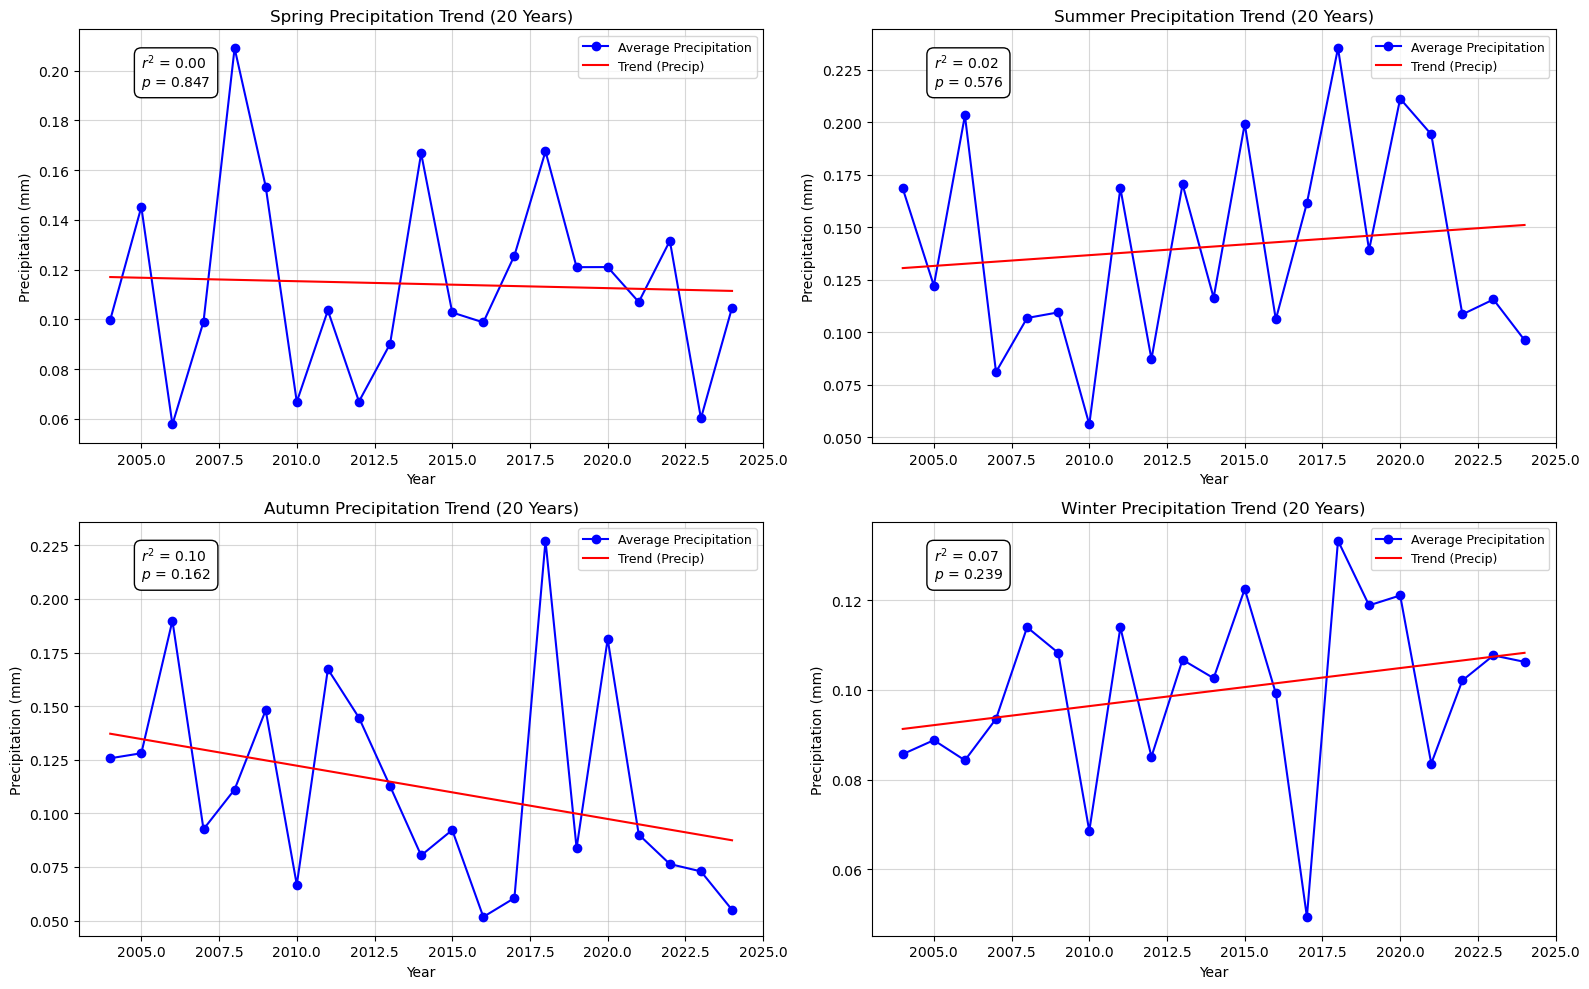

In [83]:
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Plot 20-year precipitation trends by season and add r_value and p_value
seasons = ['Spring', 'Summer', 'Autumn', 'Winter']
plt.figure(figsize=(16, 10))

# Group df by year and season to get the precipitation data
seasonal_trends = df.groupby(['year', 'season']).agg(
    precip=('precip', 'mean')  # Average precipitation
).reset_index()

for i, season in enumerate(seasons, 1):
    plt.subplot(2, 2, i)
    data = seasonal_trends[seasonal_trends['season'] == season]
    
    # Plot Average Precipitation
    plt.plot(data['year'], data['precip'], label='Average Precipitation', marker='o', color='blue')
    
    # Trend Line for Precipitation
    slope, intercept, r_value, p_value, std_err = linregress(data['year'], data['precip'])
    trend_line = intercept + slope * data['year']
    plt.plot(data['year'], trend_line, label='Trend (Precip)', color='red')
    
    # Add r_value and p_value to the plot
    text_x = data['year'].min() + 1  
    text_y = data['precip'].max() - (data['precip'].max() - data['precip'].min()) * 0.1  # Place text within a certain margin
    plt.text(
        text_x, text_y,
        f"$r^2$ = {r_value**2:.2f}\n$p$ = {p_value:.3f}",
        fontsize=10,
        bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5')
    )
    
    # Add Titles and Labels
    plt.title(f'{season} Precipitation Trend (20 Years)', fontsize=12)
    plt.xlabel('Year', fontsize=10)
    plt.ylabel('Precipitation (mm)', fontsize=10)
    plt.legend(fontsize=9)
    plt.grid(alpha=0.5)

plt.tight_layout()
plt.show()


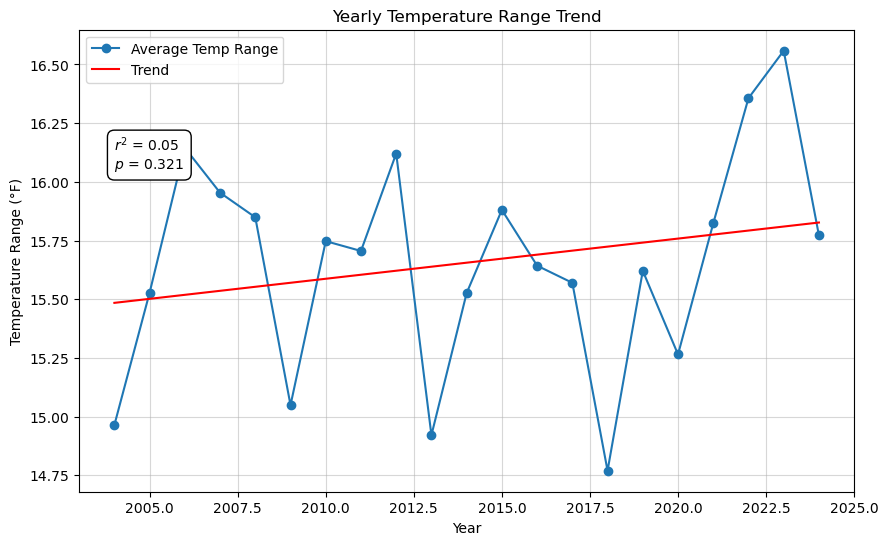

In [84]:
# Calculate the temperature fluctuation range
df['temp_range'] = df['tempmax'] - df['tempmin']

# Average temperature fluctuations by year
temp_range_trend = df.groupby('year')['temp_range'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(temp_range_trend['year'], temp_range_trend['temp_range'], marker='o', label='Average Temp Range')

slope, intercept, r_value, p_value, std_err = linregress(temp_range_trend['year'], temp_range_trend['temp_range'])
plt.plot(temp_range_trend['year'], intercept + slope * temp_range_trend['year'], label='Trend', color='red')

plt.text(temp_range_trend['year'].min(), temp_range_trend['temp_range'].max() - 0.5,
         f"$r^2$ = {r_value**2:.2f}\n$p$ = {p_value:.3f}",
         fontsize=10, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

plt.title('Yearly Temperature Range Trend')
plt.xlabel('Year')
plt.ylabel('Temperature Range (°F)')
plt.legend()
plt.grid(alpha=0.5)
plt.show()


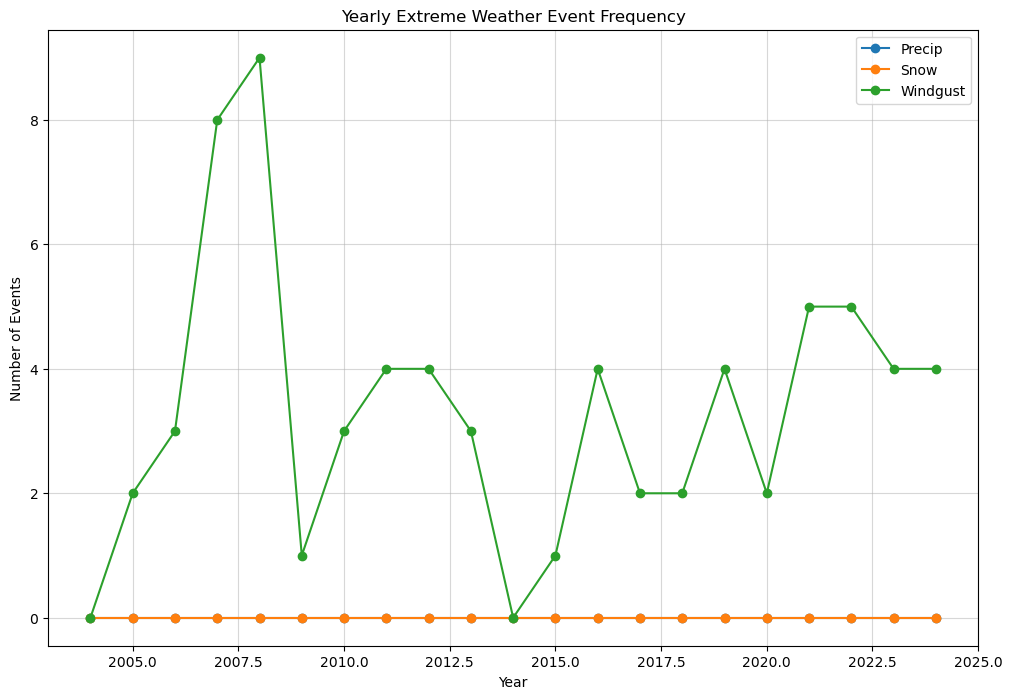

In [85]:
# Defining extreme weather thresholds
extreme_conditions = {
    'precip': 50,    
    'snow': 20,      
    'windgust': 50   
}

# Mark whether it is extreme weather
df['extreme_precip'] = df['precip'] > extreme_conditions['precip']
df['extreme_snow'] = df['snow'] > extreme_conditions['snow']
df['extreme_windgust'] = df['windgust'] > extreme_conditions['windgust']

# Frequency of extreme weather events by year
extreme_weather_trends = df.groupby('year')[['extreme_precip', 'extreme_snow', 'extreme_windgust']].sum().reset_index()

plt.figure(figsize=(12, 8))
for col in ['extreme_precip', 'extreme_snow', 'extreme_windgust']:
    plt.plot(extreme_weather_trends['year'], extreme_weather_trends[col], marker='o', label=col.replace('extreme_', '').capitalize())

plt.title('Yearly Extreme Weather Event Frequency')
plt.xlabel('Year')
plt.ylabel('Number of Events')
plt.legend()
plt.grid(alpha=0.5)
plt.show()


The figure shows that extreme precipitation and snowfall are almost zero, but the frequency of strong winds is high. The frequency of strong wind events increased rapidly from 2005 to 2007, reaching a peak in 2007. The frequency of strong wind events fluctuated greatly from 2008 to 2014, and fell sharply in 2010 before rising again. The frequency of strong wind events was relatively stable from 2015 to 2020, but there were still some fluctuations. The frequency of strong wind events increased slightly from 2020 to 2023, reaching a relatively high stable level.

### 3 Model Stage


#### 3.1 Test-Train split


In [89]:
from sklearn.model_selection import train_test_split

X = df[['year']].values  # 特征变量: 年份
y = df['temp'].values 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [90]:
print(X.shape)
print(y.shape)

(7625, 1)
(7625,)


#### 3.2 Pre-process data


In [92]:
# Numerical columns
#num_cols = []
# Categorical columns for one-hot encoding, no feature is suitable for ordinal encoding
#cat_cols = []

#preprocessor = ColumnTransformer(
#    transformers=[
 #       ('num', StandardScaler(), num_cols),  
  #      ('cat', OneHotEncoder(), cat_cols)    
  #  ])

#X_train = preprocessor.fit_transform(X_train)
#X_test = preprocessor.transform(X_test)

### 4 Evaluate models


#### 2.3.1 LinearRegression

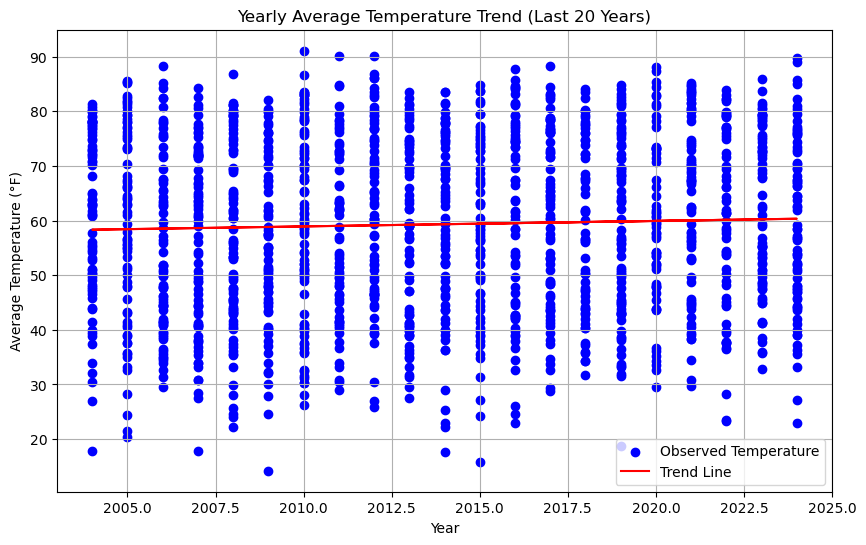

Trend Slope: 0.10038277852557577 °F/year


In [95]:
from sklearn.linear_model import LinearRegression


model = LinearRegression()
model.fit(X, y)
trend = model.predict(X_test)


plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, marker='o', label="Observed Temperature", color='blue')
plt.plot(X_test, trend, color='red', label="Trend Line")
plt.title("Yearly Average Temperature Trend (Last 20 Years)")
plt.xlabel("Year")
plt.ylabel("Average Temperature (°F)")
plt.legend()
plt.grid(True)
plt.show()

print(f"Trend Slope: {model.coef_[0]} °F/year")


In [96]:
from scipy.stats import linregress

slope, intercept, r_value, p_value, std_err = linregress(recent_temp['year'], recent_temp['temp'])
print(f"Slope: {slope} °F/year, p-value: {p_value}")
if p_value < 0.05:
    print("The trend is statistically significant.")
else:
    print("The trend is not statistically significant.")


Slope: 0.13249946294873427 °F/year, p-value: 0.0014652182504158806
The trend is statistically significant.


#### 2.3.2 Polynomial regression

MSE: 277.5430, R²: 0.0016
Coefficients: [-4.28726207e-17 -1.04613598e-13 -1.56510951e-10 -1.40095806e-07
  1.10865556e-10 -2.28464286e-14]
Intercept: 156067.8063712764


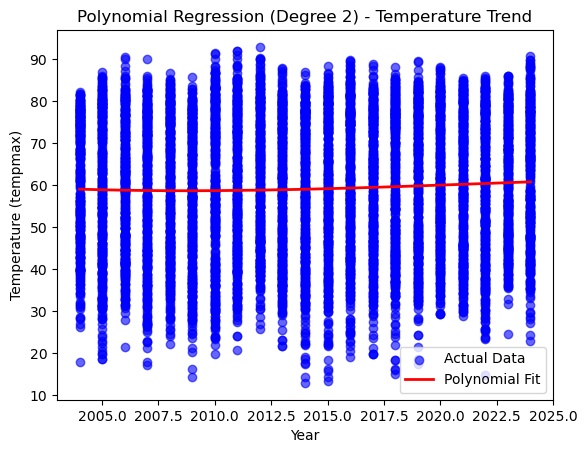

In [98]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=6, include_bias=False)
X_poly = poly.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, y)

# predict
y_pred = model.predict(X_poly)

mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print(f"MSE: {mse:.4f}, R²: {r2:.4f}")

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

plt.scatter(X, y, color='blue', label='Actual Data', alpha=0.6)
plt.plot(X, y_pred, color='red', label='Polynomial Fit', linewidth=2)
plt.xlabel("Year")
plt.ylabel("Temperature (tempmax)")
plt.title("Polynomial Regression (Degree 2) - Temperature Trend")
plt.legend()
plt.show()




Model performance indicators:
<br/>1，MSE: The error between the predicted value and the true value.
R²: The proportion of the target variable change explained by the model, the closer to 1 the better.
<br/>2, Coefficient interpretation:
The fitted equation form is: tempmax= β0 + β1*year + β2*year2
Where β1 represents the linear trend, β2 represents the quadratic trend.
<br/>3, Prediction trend:
If β2 > 0, the temperature shows an accelerated upward trend (the curve is upward).
If β2 <0, the temperature may rise first and then fall.

Fitting curve (red line):
The red quadratic curve represents the fitting result of the relationship between temperature and year.
The slope of the curve is almost horizontal, indicating that the quadratic regression model failed to find an obvious growth or decline trend.
Model performance:

MSE (309.1656): The mean square error of the model is high, indicating that the gap between the predicted value and the true value is large.
R² (0.0019): The explanatory power of the model is extremely low, and it can only explain 0.19% of the temperature change. This shows that the year has a weak explanatory significance for temperature.
Coefficient analysis:

The coefficient of the quadratic term (9.81×$10^{-3}$) is very small, indicating that the curvature of the temperature change trend is almost negligible.
The coefficient of the linear term (−39.4) and the intercept value (39626.06) have relatively small effects in a large range of data.

#### 2.3.3 Moving Average

/var/folders/0b/k_200k1n0zz0xk259hgtb7qw0000gn/T/ipykernel_44530/199325391.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recent_temp.loc[:, 'moving_avg'] = recent_temp['temp'].rolling(window=3).mean()


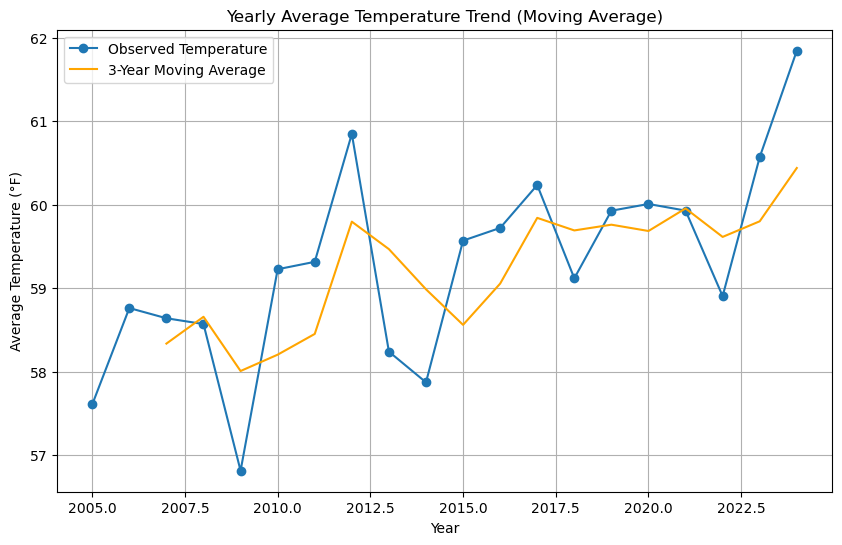

In [101]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd


X = recent_temp[['year']].values  
y = recent_temp['temp'].values 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

recent_temp.loc[:, 'moving_avg'] = recent_temp['temp'].rolling(window=3).mean()


plt.figure(figsize=(10, 6))
plt.plot(recent_temp['year'], recent_temp['temp'], marker='o', label="Observed Temperature")
plt.plot(recent_temp['year'], recent_temp['moving_avg'], color='orange', label="3-Year Moving Average")
plt.title("Yearly Average Temperature Trend (Moving Average)")
plt.xlabel("Year")
plt.ylabel("Average Temperature (°F)")
plt.legend()
plt.grid(True)
plt.show()


#### 2.3.4 Time Series Models 1 - ARIMA

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


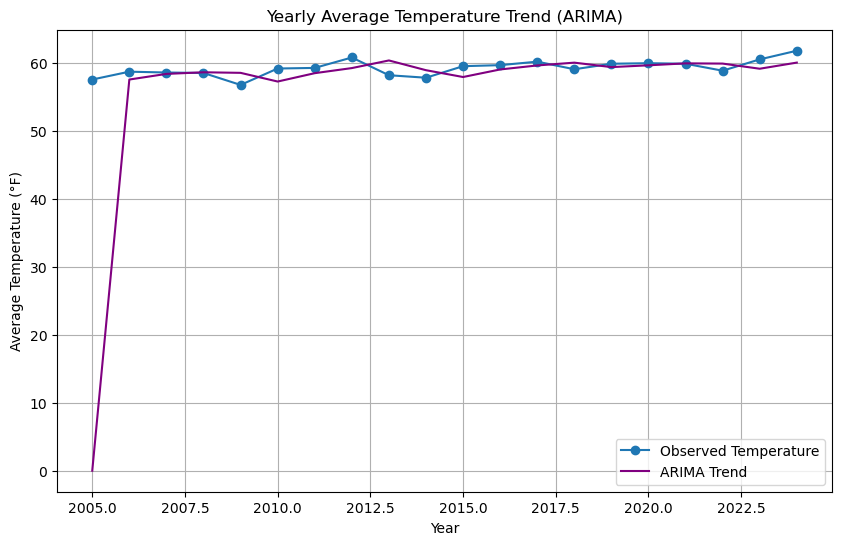

In [103]:
from statsmodels.tsa.arima.model import ARIMA

# ARIMA model（p=1, d=1, q=0）
model = ARIMA(recent_temp['temp'], order=(1, 1, 0))
result = model.fit()

plt.figure(figsize=(10, 6))
plt.plot(recent_temp['year'], recent_temp['temp'], marker='o', label="Observed Temperature")
plt.plot(recent_temp['year'], result.fittedvalues, color='purple', label="ARIMA Trend")
plt.title("Yearly Average Temperature Trend (ARIMA)")
plt.xlabel("Year")
plt.ylabel("Average Temperature (°F)")
plt.legend()
plt.grid(True)
plt.show()

#### 2.3.4 Time Series Models 2 - Seasonal decomposition
Decomposing temperature data into trend, seasonal, and residual components

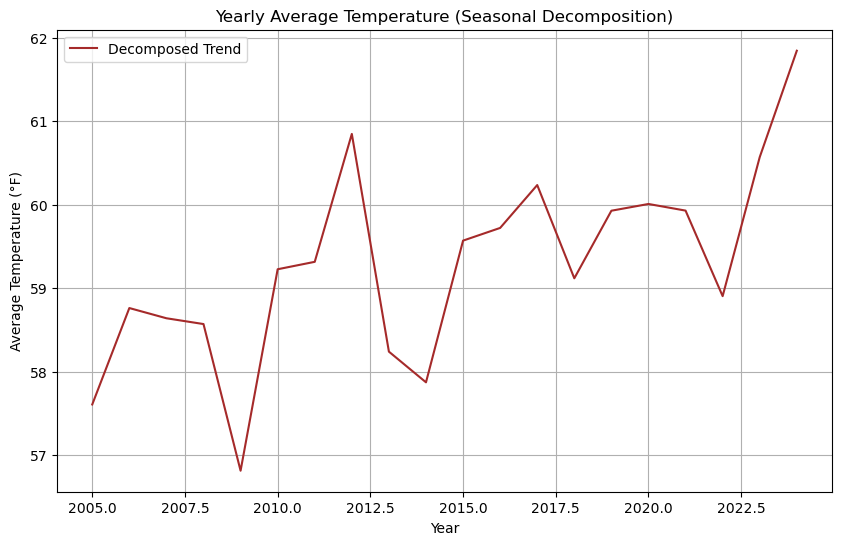

In [105]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(recent_temp['temp'], period=1, model='additive')

plt.figure(figsize=(10, 6))
plt.plot(recent_temp['year'], result.trend, color='brown', label="Decomposed Trend")
plt.title("Yearly Average Temperature (Seasonal Decomposition)")
plt.xlabel("Year")
plt.ylabel("Average Temperature (°F)")
plt.legend()
plt.grid(True)
plt.show()


#### 2.3.5 RandomForestRegressor



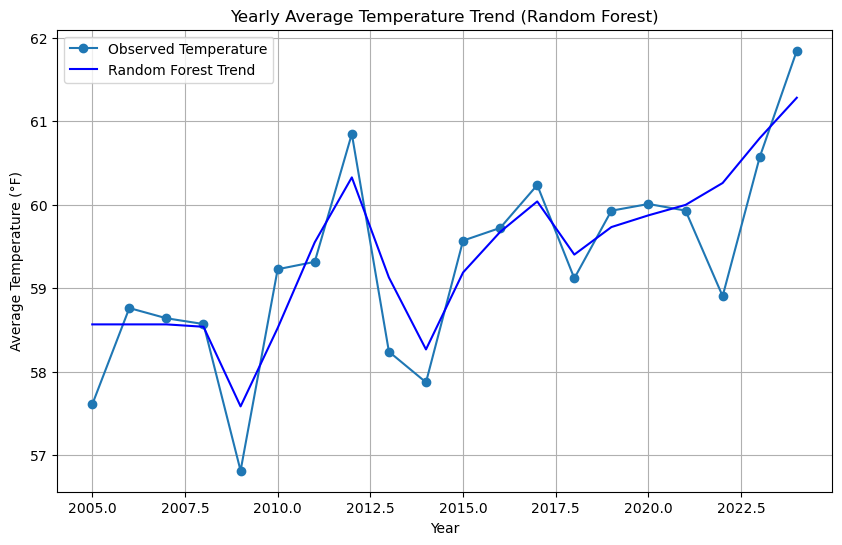

In [107]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

rf_trend = rf_model.predict(X)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(recent_temp['year'], recent_temp['temp'], marker='o', label="Observed Temperature")
plt.plot(recent_temp['year'], rf_trend, color='blue', label="Random Forest Trend")
plt.title("Yearly Average Temperature Trend (Random Forest)")
plt.xlabel("Year")
plt.ylabel("Average Temperature (°F)")
plt.legend()
plt.grid(True)
plt.show()


#### 2.3.6 SVR

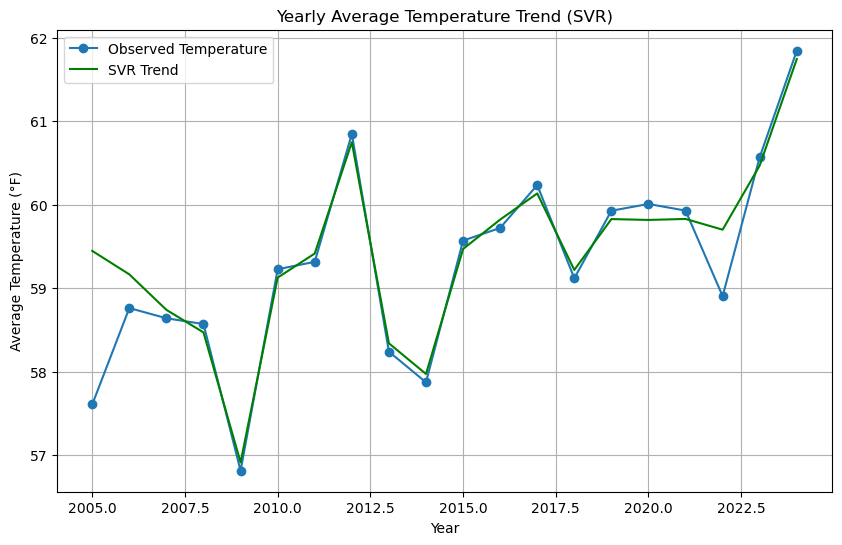

In [109]:
from sklearn.svm import SVR
import matplotlib.pyplot as plt

svr_model = SVR(kernel='rbf', C=100, gamma='auto', epsilon=0.1)

svr_model.fit(X_train, y_train)

y_pred_svr = svr_model.predict(X_test)

svr_trend = svr_model.predict(X)

plt.figure(figsize=(10, 6))

plt.plot(recent_temp['year'], recent_temp['temp'], marker='o', label="Observed Temperature")

plt.plot(recent_temp['year'], svr_trend, color='green', label="SVR Trend")
plt.title("Yearly Average Temperature Trend (SVR)")
plt.xlabel("Year")
plt.ylabel("Average Temperature (°F)")
plt.legend()
plt.grid(True)
plt.show()


#### 2.3.7 KNN

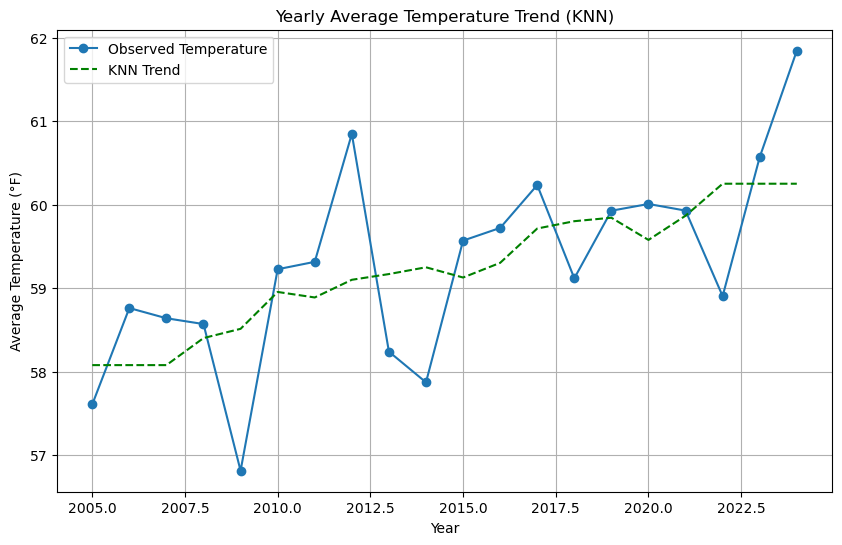

In [111]:
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt

# 训练K近邻回归模型
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X, y)

# 预测趋势
knn_trend = knn_model.predict(X)

# 可视化
plt.figure(figsize=(10, 6))
plt.plot(recent_temp['year'], recent_temp['temp'], marker='o', label="Observed Temperature")
plt.plot(recent_temp['year'], knn_trend, color='green', label="KNN Trend", linestyle='--')
plt.title("Yearly Average Temperature Trend (KNN)")
plt.xlabel("Year")
plt.ylabel("Average Temperature (°F)")
plt.legend()
plt.grid(True)
plt.show()


#### 4.1 Randomfroest


In [113]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred)

print(f"Random Forest - MSE: {mse_rf:.4f}, RMSE: {rmse_rf:.4f}, R²: {r2_rf:.4f}")



Random Forest - MSE: 0.7050, RMSE: 0.8396, R²: 0.0278


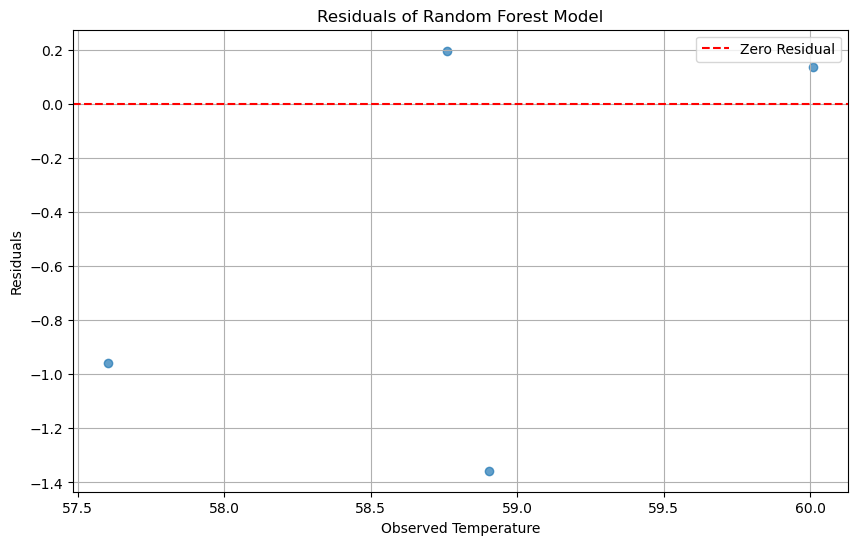

In [114]:
# 计算残差
residuals = y_test - y_pred

# 可视化残差分布
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--', label="Zero Residual")
plt.title("Residuals of Random Forest Model")
plt.xlabel("Observed Temperature")
plt.ylabel("Residuals")
plt.legend()
plt.grid(True)
plt.show()


#### 4.2 SVR


In [116]:
from sklearn.svm import SVR

svr_model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.01)
svr_model.fit(X, y)

svr_trend = svr_model.predict(X)

mse_svr = mean_squared_error(y, svr_trend)
rmse_svr = np.sqrt(mse_svr)
r2_svr = r2_score(y, svr_trend)
print(f"SVR           - MSE: {mse_svr:.4f}, RMSE: {rmse_svr:.4f}, R²: {r2_svr:.4f}")


SVR           - MSE: 0.3177, RMSE: 0.5637, R²: 0.7613


#### 4.3 KNN


In [118]:
from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X, y)

knn_trend = knn_model.predict(X)

mse_knn = mean_squared_error(y, knn_trend)
rmse_knn = np.sqrt(mse_knn)
r2_knn = r2_score(y, knn_trend)

print(f"KNN           - MSE: {mse_knn:.4f}, RMSE: {rmse_knn:.4f}, R²: {r2_knn:.4f}")


KNN           - MSE: 0.7893, RMSE: 0.8884, R²: 0.4069


In [119]:
print(f"Random Forest - MSE: {mse_rf:.4f}, RMSE: {rmse_rf:.4f}, R²: {r2_rf:.4f}")
print(f"SVR           - MSE: {mse_svr:.4f}, RMSE: {rmse_svr:.4f}, R²: {r2_svr:.4f}")
print(f"KNN           - MSE: {mse_knn:.4f}, RMSE: {rmse_knn:.4f}, R²: {r2_knn:.4f}")


Random Forest - MSE: 0.7050, RMSE: 0.8396, R²: 0.0278
SVR           - MSE: 0.3177, RMSE: 0.5637, R²: 0.7613
KNN           - MSE: 0.7893, RMSE: 0.8884, R²: 0.4069


MSE - Mean Squared Error：<br/>
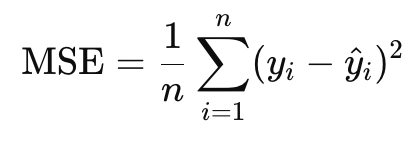
<br/> R² analysis:
The R² value of Random Forest is 0.4537, indicating that the model can explain about 45.37% of the target variable fluctuations.
The R² values ​​of SVR and KNN are both around 0.406, indicating that they can explain about 40.6% of the fluctuations.
The R² values ​​of all models are lower than 0.5, indicating that there is still a lot of room for improvement in the model, and more features or more complex model structures may be needed.
Error analysis (MSE and RMSE):
The absolute values ​​of MSE and RMSE indicate that the prediction error is still high, especially for issues such as warming weather that may be affected by multiple complex factors.

### 5 Hyper-parameter optimisation



In [122]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
import os
os.environ["TOKENIZERS_PARALLELISM"] = "false"


param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [0.001, 0.01, 0.1, 1, 10],
    'epsilon': [0.001, 0.01, 0.1, 0.2],
    'kernel': ['rbf']  
}


svr = SVR()

# Cross Validation with GridSearchCV
grid_search = GridSearchCV(estimator=svr, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

grid_search.fit(X, y)

print("Best Parameters:", grid_search.best_params_)

best_svr_model = grid_search.best_estimator_
svr_trend = best_svr_model.predict(X)

from sklearn.metrics import mean_squared_error, r2_score
mse_svr = mean_squared_error(y, svr_trend)
rmse_svr = np.sqrt(mse_svr)
r2_svr = r2_score(y, svr_trend)

print(f"MSE: {mse_svr:.4f}, RMSE: {rmse_svr:.4f}, R²: {r2_svr:.4f}")


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters: {'C': 10, 'epsilon': 0.2, 'gamma': 0.001, 'kernel': 'rbf'}
MSE: 0.7902, RMSE: 0.8890, R²: 0.4062


In [123]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

rf_model = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200, 300],  # Number of trees
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples when splitting internal nodes
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples for a leaf node
    'max_features': ['sqrt', 'log2', None],  # The number of features used in each tree
    'bootstrap': [True, False]  # Whether to use self-service sampling
}


# Hyperparameter optimization using GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

grid_search.fit(X, y)

print("Best Parameters:", grid_search.best_params_)

# Create a model using the optimal parameters and predict
best_rf_model = grid_search.best_estimator_
rf_trend = best_rf_model.predict(X)

# Calculation performance indicators
mse_rf = mean_squared_error(y, rf_trend)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y, rf_trend)

print(f"MSE: {mse_rf:.4f}, RMSE: {rmse_rf:.4f}, R²: {r2_rf:.4f}")



Fitting 5 folds for each of 864 candidates, totalling 4320 fits
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END .max_depth=10, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END .max_depth=10, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END max_depth=20, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=20, min_sampl

Best Parameters: {'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}
#MSE: 0.7212, RMSE: 0.8492, R²: 0.4581

In [125]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

rf_model = RandomForestRegressor(random_state=42)

param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Use RandomizedSearchCV 
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist, n_iter=100, cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error', random_state=42)

random_search.fit(X, y)

print("Best Parameters:", random_search.best_params_)

best_rf_model = random_search.best_estimator_
rf_trend = best_rf_model.predict(X)

from sklearn.metrics import mean_squared_error, r2_score
mse_rf = mean_squared_error(y, rf_trend)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y, rf_trend)

print(f"MSE: {mse_rf:.4f}, RMSE: {rmse_rf:.4f}, R²: {r2_rf:.4f}")


Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.1s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200;

/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
145 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
64 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/opt/anaconda3/lib/python3.12/site-pa

Best Parameters: {'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}
MSE: 0.7212, RMSE: 0.8492, R²: 0.4581
Selection deleted


### 6 Evaluation of the final model




#### 6.1 Error Matrix


SVR Error Matrix:
col_0    Error Count
row_0               
[-1, 0)            1
[0, 1)             3

Random Forest Error Matrix:
col_0    Error Count
row_0               
[-1, 0)            2
[0, 1)             1
> 1                1


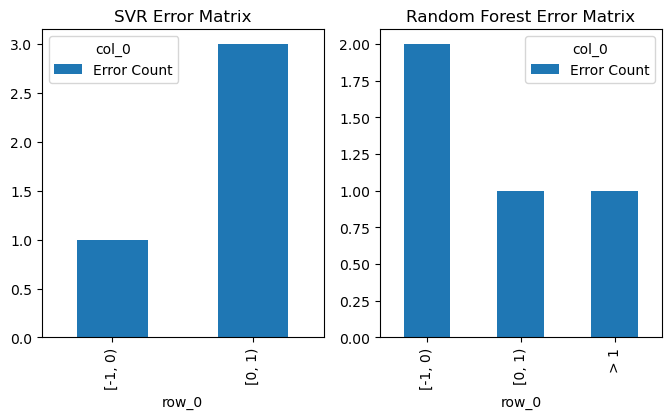

In [129]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Training and prediction
svr_model.fit(X_train, y_train)
y_pred_svr = svr_model.predict(X_test)

rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Calculation error
error_svr = y_pred_svr - y_test
error_rf = y_pred_rf - y_test

# Statistical error margin
error_svr_categories = pd.cut(error_svr, bins=[-np.inf, -1, 0, 1, np.inf], labels=['< -1', '[-1, 0)', '[0, 1)', '> 1'])
error_rf_categories = pd.cut(error_rf, bins=[-np.inf, -1, 0, 1, np.inf], labels=['< -1', '[-1, 0)', '[0, 1)', '> 1'])

# Generate error matrix
conf_matrix_svr = pd.crosstab(index=error_svr_categories, columns='Error Count')
conf_matrix_rf = pd.crosstab(index=error_rf_categories, columns='Error Count')

print("SVR Error Matrix:")
print(conf_matrix_svr)
print("\nRandom Forest Error Matrix:")
print(conf_matrix_rf)

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
conf_matrix_svr.plot(kind='bar', ax=axes[0], title='SVR Error Matrix')
conf_matrix_rf.plot(kind='bar', ax=axes[1], title='Random Forest Error Matrix')
plt.show()


SVR has smaller and more concentrated prediction errors, showing greater stability.
Random forest performs well in most cases, but occasionally has large errors and may overfit or underfit on some samples.

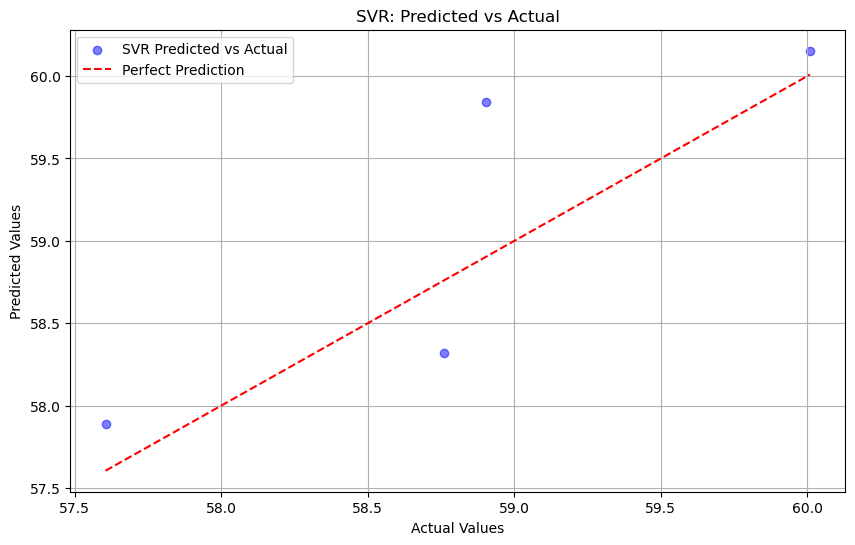

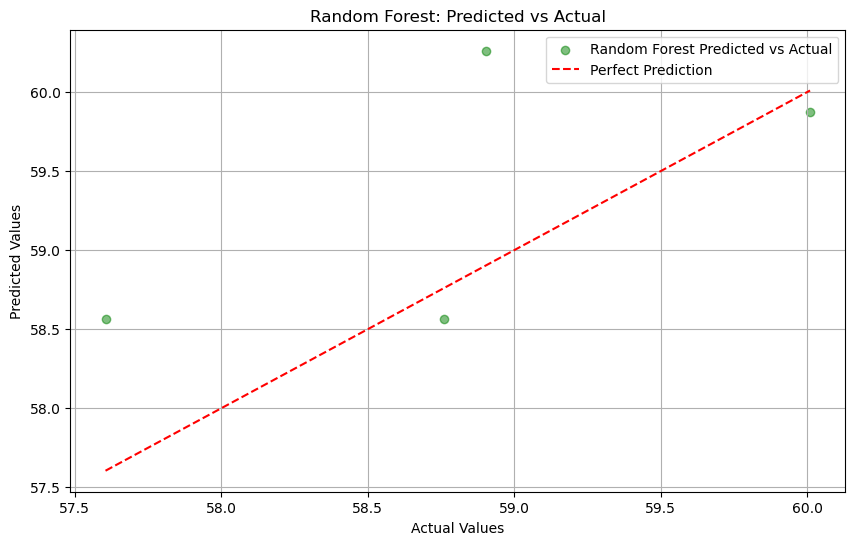

In [131]:
# Draw a scatter plot of SVR's predicted values ​​and actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_svr, color='blue', label='SVR Predicted vs Actual', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label="Perfect Prediction")
plt.title("SVR: Predicted vs Actual")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.grid(True)
plt.show()

# # Draw a scatter plot of Random Forest's predicted values ​​and actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, color='green', label='Random Forest Predicted vs Actual', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label="Perfect Prediction")
plt.title("Random Forest: Predicted vs Actual")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.grid(True)
plt.show()


As can be seen from the figure, most points are close to Perfect Prediction, indicating that the model's prediction effect is good. However, some points deviate from the red line, indicating that the model has certain errors in its predictions on these samples.